# EDA 프로젝트: 
# 프로그래밍 언어 TOP10 인기순위 분석


<br/>

## 목차

## 1. TIOBE INDEX 페이지에서 TOP10정보 긁어오기

## 2. 각 언어별 출판되는 책의 양으로 인기도 확인

## 3. 시각화

---

# 1. TIOBE INDEX 페이지에서 TOP10정보 긁어오기
- 상위 1~9위 언어와 전통강자 R까지!

In [4]:
import pandas as pd
import numpy as np
import requests
import time
from urllib.request import urlopen
from bs4 import BeautifulSoup
import warnings
warnings.simplefilter(action='ignore')


In [6]:
url = 'https://www.tiobe.com/tiobe-index/'
response = urlopen(url)
# response.status
soup = BeautifulSoup(response, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <title>
   index | TIOBE - The Software Quality Company
  </title>
  <link href="//fonts.googleapis.com/css?family=Roboto:300,400,500,700" rel="stylesheet" type="text/css"/>
  <link href="//fonts.googleapis.com/css?family=Roboto+Slab:300" rel="stylesheet" type="text/css"/>
  <link href="/images/tiobe.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/stylesheets/normalize.css" rel="stylesheet"/>
  <link href="/stylesheets/main_prefixed.css?1623057826709" rel="stylesheet"/>
  <link href="/stylesheets/slicknav.min.css" rel="stylesheet">
   <meta content="width=device-width, initial-scale=1" name="viewport">
    <script src="/js/jquery-1.8.0.release.js" type="text/javascript">
    </script>
    <script src="/js/vendor/modernizr-2.6.2.min.js">
    </script>
    <script src="//ajax.googleapis.com/ajax/libs/jquery/1.10.2/jquery.min.js">
    </script>
    <script src=

In [68]:
tiobe_index = soup.select('tbody > tr')

In [52]:
# 올해순위
soup.select('tr > td')[0].text

'1'

In [53]:
# 작년순위
soup.select('tr > td')[1].text

'3'

In [56]:
# 이름
soup.select('tr > td')[4].text

'Python'

In [57]:
# 점유율
soup.select('tr > td')[5].text

'11.27%'

In [76]:
datas = []

for tio in tiobe_index[:14]:
    r_2021 = tio.select('tr > td')[0].text
    r_2020 = tio.select('tr > td')[1].text
    name = tio.select('tr > td')[4].text
    rates = tio.select('tr > td')[5].text
    datas.append({
        'rank_2021':r_2021,
        'language':name,
        'ratings':rates,
        'rank_2020':r_2020
    })
    

In [90]:
df = pd.DataFrame(datas)
df

,rank_2021,language,ratings,rank_2020
0,1,Python,11.27%,3
1,2,C,11.16%,1
2,3,Java,10.46%,2
3,4,C++,7.50%,4
4,5,C#,5.26%,5
5,6,Visual Basic,5.24%,6
6,7,JavaScript,2.19%,7
7,8,SQL,2.17%,10
8,9,PHP,2.10%,8
9,10,Assembly language,2.06%,17


In [91]:
# 숫자 데이터로 형 변환
df['rank_2021'] = df['rank_2021'].astype(int)
df['rank_2020'] = df['rank_2020'].astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rank_2021  14 non-null     int64 
 1   language   14 non-null     object
 2   ratings    14 non-null     object
 3   rank_2020  14 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 576.0+ bytes


In [99]:
df2 = df.copy()

In [170]:
df = df[df['rank_2021'] < 10]

In [171]:
df2 = df2[df2['rank_2021'] == 14]

In [172]:
tiobe = pd.concat([df,df2], ignore_index=True)
tiobe

,rank_2021,language,ratings,rank_2020
0,1,Python,11.27%,3
1,2,C,11.16%,1
2,3,Java,10.46%,2
3,4,C++,7.50%,4
4,5,C#,5.26%,5
5,6,Visual Basic,5.24%,6
6,7,JavaScript,2.19%,7
7,8,SQL,2.17%,10
8,9,PHP,2.10%,8
9,14,R,1.20%,9


In [173]:
# 리스트에 담아주기
tiobe_top10 = list(tiobe['language'])
tiobe_top10

['Python',
 'C',
 'Java',
 'C++',
 'C#',
 'Visual Basic',
 'JavaScript',
 'SQL',
 'PHP',
 'R']

In [263]:
# 검색어 추가해주기
tiobe_top10.insert(1,'파이썬')
tiobe_top10.insert(3,'C 언어')
tiobe_top10.insert(4,'자바')
tiobe_top10.insert(8,'비주얼 베이직')
tiobe_top10.insert(10,'자바스크립트')
tiobe_top10.insert(15,'R 언어')
tiobe_top10

['Python',
 '파이썬',
 'C',
 'C 언어',
 'Java',
 '자바',
 'C++',
 'C#',
 'Visual Basic',
 '비주얼 베이직',
 'JavaScript',
 '자바스크립트',
 'SQL',
 'PHP',
 'R',
 'R 언어']

---

# 2. 각 언어별 출판되는 책의 양으로 인기도 확인


- C, R 언어 같은 경우는 그냥 검색하면 정확한 검색이 어렵기 때문에, 책 제목에 검색어가 포함되는 조건과, 책 카테고리를 'IT/전문서'로 특정하는 조건을 추가하여 검색을 실시하였습니다.


- 상세검색 by 카테고리, 책제목
- IT 전문서 : 280020

## 문제 1) 각 언어별 출판 책 정보 수집
- 제목, 출판사, 출판일, 가격, ISBN, 검색키워드(언어명),책 링크
- 중복데이터(ISBN 기준) 삭제

#### (1) gen_search_url : 검색 url을 만들어주는 함수
- 검색량 변화를 확인해보기위해 함수를 세 가지 형태로 만들어주었습니다.

In [185]:
# (1) 기본 검색 url을 만들어주는 함수
def gen_search_url(search_text, start_num, disp_num):
    base = 'https://openapi.naver.com/v1/search/book.json'
    param_query = '?query=' + urllib.parse.quote(search_text)
    param_start = '&start=' + str(start_num)
    param_disp = '&display=' + str(disp_num)
    return base + param_query + param_start + param_disp

In [212]:
# (2) 책 제목만 사용하는 url을 만들어주는 함수
def gen_search_url_bookname(search_text, start_num, disp_num):
    base = 'https://openapi.naver.com/v1/search/book_adv'
    param_title = '?d_titl=' + urllib.parse.quote(search_text)
    param_start = '&start=' + str(start_num)
    param_disp = '&display=' + str(disp_num)
    return base + param_title + param_start + param_disp

In [217]:
# (3) 책 제목과 카테고리를 사용하는 url을 만들어주는 함수
def gen_search_url_catg_bookname(search_text, start_num, disp_num):
    base = 'https://openapi.naver.com/v1/search/book_adv'
    param_catg = '?d_catg=280020'
    param_title = '&d_titl=' + urllib.parse.quote(search_text)
    param_start = '&start=' + str(start_num)
    param_disp = '&display=' + str(disp_num)
    return base + param_catg + param_title + param_start + param_disp

In [218]:
gen_search_url_catg_bookname('파이썬', 10, 3)

'https://openapi.naver.com/v1/search/book_adv?d_catg=280020&d_titl=%ED%8C%8C%EC%9D%B4%EC%8D%AC&start=10&display=3'

#### (2) get_result_onepage() : 한페이지 검색 결과를 가져오는 함수

In [219]:
import json
import datetime

def get_result_onepage(url):
    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)
    request.add_header('X-Naver-Client-Secret', client_secret)
    response = urllib.request.urlopen(request)
    print('[%s] Url Request Success' % datetime.datetime.now())
    return json.loads(response.read().decode('utf-8'))

In [235]:
url = gen_search_url_catg_bookname('R', 1, 1)
one_result = get_result_onepage(url)
one_result

[2021-10-21 14:55:42.056043] Url Request Success


{'lastBuildDate': 'Thu, 21 Oct 2021 14:55:42 +0900',
 'total': 249,
 'start': 1,
 'display': 1,
 'items': [{'title': '안드로이드 프로그래밍 (Android Studio를 활용한,Android 11.0 (<b>R</b>) 지원, Android Studio 4.x 사용)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=17764819',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/177/648/17764819.jpg?type=m1&udate=20210624',
   'author': '우재남|박길식',
   'price': '32000',
   'discount': '31360',
   'publisher': '한빛아카데미',
   'pubdate': '20210107',
   'isbn': '1156645247 9791156645245',
   'description': 'Android 11.0 (<b>R</b>) 버전으로 만나는 Android Studio를 활용한 안드로이드 프로그래밍\n1.\t초보자도 쉽게 접근할 수 있도록 친절하게 설명합니다.\n2.\t프로그램을... 3.\t안드로이드 11.0(<b>R</b>) 버전, Android Studio 4.1을 적용하여 실습합니다.\n4.\t원 클릭으로 모든 개발 환경이 구축되는 통합 실습 환경 파일을 제공합니다.'}]}

In [264]:
# 그냥 키워드로 검색
datas1 = []

for top in tiobe_top10:
    url = gen_search_url(top, 1, 1)
    one_result = get_result_onepage(url)
    total = one_result['total']
    datas1.append({
        '언어':top,
        'total':total
    })
datas1 = pd.DataFrame(datas1)
datas1

[2021-10-21 15:09:38.576670] Url Request Success
[2021-10-21 15:09:38.662726] Url Request Success
[2021-10-21 15:09:38.959521] Url Request Success
[2021-10-21 15:09:39.103052] Url Request Success
[2021-10-21 15:09:39.241176] Url Request Success
[2021-10-21 15:09:39.462731] Url Request Success
[2021-10-21 15:09:39.586893] Url Request Success
[2021-10-21 15:09:39.701915] Url Request Success
[2021-10-21 15:09:39.927094] Url Request Success
[2021-10-21 15:09:40.047076] Url Request Success
[2021-10-21 15:09:40.184098] Url Request Success
[2021-10-21 15:09:40.277784] Url Request Success
[2021-10-21 15:09:40.511730] Url Request Success
[2021-10-21 15:09:40.639849] Url Request Success
[2021-10-21 15:09:40.905918] Url Request Success
[2021-10-21 15:09:41.037267] Url Request Success


,언어,total
0,Python,6671
1,파이썬,1381
2,C,481036
3,C 언어,15974
4,Java,16541
5,자바,4540
6,C++,7906
7,C#,3519
8,Visual Basic,8433
9,비주얼 베이직,1006


In [265]:
# 키워드가 책 제목에 들어간 책 검색
datas2 = []

for top in tiobe_top10:
    url = gen_search_url_bookname(top, 1, 1)
    one_result = get_result_onepage(url)
    total = one_result['total']
    datas2.append({
        '언어':top,
        'total_bookname':total
    })
datas2 = pd.DataFrame(datas2)
datas2

[2021-10-21 15:09:46.811529] Url Request Success
[2021-10-21 15:09:46.916577] Url Request Success
[2021-10-21 15:09:47.062794] Url Request Success
[2021-10-21 15:09:47.259930] Url Request Success
[2021-10-21 15:09:47.386033] Url Request Success
[2021-10-21 15:09:47.495809] Url Request Success
[2021-10-21 15:09:47.612491] Url Request Success
[2021-10-21 15:09:47.851559] Url Request Success
[2021-10-21 15:09:47.994612] Url Request Success
[2021-10-21 15:09:48.098491] Url Request Success
[2021-10-21 15:09:48.306815] Url Request Success
[2021-10-21 15:09:48.393200] Url Request Success
[2021-10-21 15:09:48.609075] Url Request Success
[2021-10-21 15:09:48.728160] Url Request Success
[2021-10-21 15:09:49.008080] Url Request Success
[2021-10-21 15:09:49.124778] Url Request Success


,언어,total_bookname
0,Python,4621
1,파이썬,692
2,C,93235
3,C 언어,919
4,Java,9036
5,자바,967
6,C++,4885
7,C#,2144
8,Visual Basic,2374
9,비주얼 베이직,400


In [266]:
# 책 제목 + IT 전문서 카테고리로 검색
datas3 = []

for top in tiobe_top10:
    url = gen_search_url_detail_catg(top, 1, 1)
    one_result = get_result_onepage(url)
    total = one_result['total']
    datas3.append({
        '언어':top,
        'total_category':total
    })
datas3 = pd.DataFrame(datas3)
datas3

[2021-10-21 15:10:09.977232] Url Request Success
[2021-10-21 15:10:10.073074] Url Request Success
[2021-10-21 15:10:10.265234] Url Request Success
[2021-10-21 15:10:10.414812] Url Request Success
[2021-10-21 15:10:10.517362] Url Request Success
[2021-10-21 15:10:10.607125] Url Request Success
[2021-10-21 15:10:10.708515] Url Request Success
[2021-10-21 15:10:10.977710] Url Request Success
[2021-10-21 15:10:11.079731] Url Request Success
[2021-10-21 15:10:11.185617] Url Request Success
[2021-10-21 15:10:11.381250] Url Request Success
[2021-10-21 15:10:11.471650] Url Request Success
[2021-10-21 15:10:11.569026] Url Request Success
[2021-10-21 15:10:11.669719] Url Request Success
[2021-10-21 15:10:12.011988] Url Request Success
[2021-10-21 15:10:12.108640] Url Request Success


,언어,total_category
0,Python,194
1,파이썬,644
2,C,2476
3,C 언어,785
4,Java,722
5,자바,813
6,C++,1024
7,C#,297
8,Visual Basic,315
9,비주얼 베이직,323


In [267]:
# 하나의 데이터프레임으로 합쳐주기
datas = pd.merge(datas1,datas2,how='left',on='언어')
datas = pd.merge(datas, datas3, how='left', on='언어')
search_total = datas
search_total

,언어,total,total_bookname,total_category
0,Python,6671,4621,194
1,파이썬,1381,692,644
2,C,481036,93235,2476
3,C 언어,15974,919,785
4,Java,16541,9036,722
5,자바,4540,967,813
6,C++,7906,4885,1024
7,C#,3519,2144,297
8,Visual Basic,8433,2374,315
9,비주얼 베이직,1006,400,323


In [271]:
search_total.sort_values(by='total_category', ascending=False)

,언어,total,total_bookname,total_category
2,C,481036,93235,2476
6,C++,7906,4885,1024
5,자바,4540,967,813
3,C 언어,15974,919,785
4,Java,16541,9036,722
1,파이썬,1381,692,644
12,SQL,10352,3994,455
9,비주얼 베이직,1006,400,323
8,Visual Basic,8433,2374,315
7,C#,3519,2144,297


<br/>

- 전체 검색 건수를 대략적으로 확인해보니, 검색어마다 편차가 큰 것을 알 수 있다.
- 카테고리까지 사용하여서 분석에 이용하면 좋은데, 아쉬운 부분은 해외도서량이 다른 카테고리여서 비포함된다는 점이다.
- 그렇지만, 이번 분석에서 사용하는 네이버 API의 검색 제한량이 1000개이기 때문에 카테고리까지 사용해서 검색하여 정보를 불러오는 것이 적당해보인다.

<br/>

In [216]:
url = gen_search_url_detail_catg('R', 1, 3)
one_result = get_result_onepage(url)
one_result

[2021-10-21 14:33:03.659774] Url Request Success


{'lastBuildDate': 'Thu, 21 Oct 2021 14:33:03 +0900',
 'total': 249,
 'start': 1,
 'display': 3,
 'items': [{'title': '안드로이드 프로그래밍 (Android Studio를 활용한,Android 11.0 (<b>R</b>) 지원, Android Studio 4.x 사용)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=17764819',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/177/648/17764819.jpg?type=m1&udate=20210624',
   'author': '우재남|박길식',
   'price': '32000',
   'discount': '31360',
   'publisher': '한빛아카데미',
   'pubdate': '20210107',
   'isbn': '1156645247 9791156645245',
   'description': 'Android 11.0 (<b>R</b>) 버전으로 만나는 Android Studio를 활용한 안드로이드 프로그래밍\n1.\t초보자도 쉽게 접근할 수 있도록 친절하게 설명합니다.\n2.\t프로그램을... 3.\t안드로이드 11.0(<b>R</b>) 버전, Android Studio 4.1을 적용하여 실습합니다.\n4.\t원 클릭으로 모든 개발 환경이 구축되는 통합 실습 환경 파일을 제공합니다.'},
  {'title': '데이터 과학을 위한 통계 : 데이터 분석에서 머신러닝까지 파이썬과 <b>R</b>로 살펴보는 50가지 핵심 개념 (2판)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=19068565',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/190/685/1

In [193]:
# 총 검색 결과 개수
one_result['total']

111300

In [117]:
one_result['items'][0] # 리스트 벗기기

{'title': '이것이 취업을 위한 코딩 테스트다 with <b>파이썬</b> (취업과 이직을 결정하는 알고리즘 인터뷰 완벽 가이드, C/C++, 자바 코드 제공)',
 'link': 'http://book.naver.com/bookdb/book_detail.php?bid=16439154',
 'image': 'https://bookthumb-phinf.pstatic.net/cover/164/391/16439154.jpg?type=m1&udate=20200928',
 'author': '나동빈',
 'price': '34000',
 'discount': '30600',
 'publisher': '한빛미디어',
 'pubdate': '20200805',
 'isbn': '1162243074 9791162243077',
 'description': '8가지 핵심 알고리즘 이론을 쉽게 설명하고, 관련 실전 문제를 풀이했다. 출제 유형 분석, 이론 설명, 기출문제 풀이까지! 어떤 코딩 테스트도 이 책 한 권으로 대비할 수 있을 것이다. 코딩 테스트에서 주로 선택하는 <b>파이썬</b>을 기반으로 설명되어 있으며, <b>파이썬</b> 코드 외에도 C/C++, 자바 코드를 추가로 제공한다.'}

In [119]:
# 제목
one_result['items'][0]['title']

'이것이 취업을 위한 코딩 테스트다 with <b>파이썬</b> (취업과 이직을 결정하는 알고리즘 인터뷰 완벽 가이드, C/C++, 자바 코드 제공)'

In [118]:
# 출판일자
one_result['items'][0]['pubdate']

'20200805'

In [120]:
# 가격
one_result['items'][0]['price']

'34000'

In [121]:
# 출판사
one_result['items'][0]['publisher']

'한빛미디어'

In [122]:
# ISBN
one_result['items'][0]['isbn']

'1162243074 9791162243077'

#### (3) delete_tag() : 제목에 포함된 태그를 벗기는 함수

In [123]:
def delete_tag(input_str):
    input_str = input_str.replace('<b>', '')
    input_str = input_str.replace('</b>','')
    return input_str

In [124]:
delete_tag(one_result['items'][0]['title'])

'이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘 인터뷰 완벽 가이드, C/C++, 자바 코드 제공)'

#### (4) get_fields() : 각 데이터를 가져와 데이터프레임으로 만들어주는 함수

In [272]:
import pandas as pd

def get_fields(json_data, language):
    title = [delete_tag(each['title']) for each in json_data['items']]
    pubdate = [each['pubdate'] for each in json_data['items']]
    price = [each['price'] for each in json_data['items']]
    publisher = [each['publisher'] for each in json_data['items']]
    isbn = [each['isbn'] for each in json_data['items']]
    link = [each['link'] for each in json_data['items']]
    
    result_pd = pd.DataFrame({
        '제목' : title,
        '출판사' : publisher,
        '출판일': pubdate,
        '가격' : price,
        'ISBN' : isbn,
        '언어' : language,
        '링크' : link
    })
    return result_pd

In [127]:
get_fields(one_result)

,제목,출판사,출판일,가격,ISBN
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,한빛미디어,20200805,34000,1162243074 9791162243077
1,Do it! 점프 투 파이썬,이지스퍼블리싱,20190620,18800,1163030910 9791163030911
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),한빛미디어,20190610,18000,1162241888 9791162241882
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),책만,20200715,38000,1189909170 9791189909178
4,"파이썬 증권 데이터 분석 (파이썬 입문, 웹 스크레이핑, 트레이딩 전략, 자동 매매)",한빛미디어,20200701,32000,1162243201 9791162243206
5,파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법...,위키북스,20200207,38000,1158391927 9791158391928
6,한 권으로 끝내는 파이썬 인공지능 입문 + 실전 종합편 (파이썬+넘파이+텐서플로우로...,앤써북,20210925,23000,118555386X 9791185553863
7,"파이썬을 이용한 비트코인 자동매매 (실시간 자동매매 시스템 개발 입문, 개정판)",파이스탁,20210322,27000,1196608814 9791196608811
8,Do it! 파이썬 생활 프로그래밍 (웹 크롤링부터 데이터 분석까지 내 손으로 직접...,이지스퍼블리싱,20200727,20000,1163031739 9791163031734
9,Do it! 첫 파이썬 (게임하듯 배우는 나의 첫 프로그래밍 책),이지스퍼블리싱,20200410,14000,1163031569 9791163031567


In [273]:
tiobe_top10

['Python',
 '파이썬',
 'C',
 'C 언어',
 'Java',
 '자바',
 'C++',
 'C#',
 'Visual Basic',
 '비주얼 베이직',
 'JavaScript',
 '자바스크립트',
 'SQL',
 'PHP',
 'R',
 'R 언어']

In [144]:
book_df = []
for top in tiobe_top10:
    df_name = 'book_'+ top
    book_df.append(df_name)
book_df

['book_Python',
 'book_C',
 'book_Java',
 'book_C++',
 'book_C#',
 'book_Visual Basic',
 'book_JavaScript',
 'book_SQL',
 'book_PHP',
 'book_Assembly language',
 'book_R']

## 데이터 긁어오기!!!

In [292]:
book_final = []

for top in tiobe_top10:
    
    book_result = []
    print(top)
    
    for n in range(1, 1000, 100):
        url = gen_search_url_catg_bookname(top, n, 100)
        json_result = get_result_onepage(url)
        pd_result = get_fields(json_result, top)
        book_result.append(pd_result)
    book_result = pd.concat(book_result,ignore_index=True)
    time.sleep(3)    
    book_final.append(book_result)

Python
[2021-10-21 15:37:40.139345] Url Request Success
[2021-10-21 15:37:40.485723] Url Request Success
[2021-10-21 15:37:40.596648] Url Request Success
[2021-10-21 15:37:40.776653] Url Request Success
[2021-10-21 15:37:40.868303] Url Request Success
[2021-10-21 15:37:40.960158] Url Request Success
[2021-10-21 15:37:41.065179] Url Request Success
[2021-10-21 15:37:41.173782] Url Request Success
[2021-10-21 15:37:41.432371] Url Request Success
[2021-10-21 15:37:41.524304] Url Request Success
파이썬
[2021-10-21 15:37:45.056013] Url Request Success
[2021-10-21 15:37:45.626895] Url Request Success
[2021-10-21 15:37:46.068029] Url Request Success
[2021-10-21 15:37:46.486702] Url Request Success
[2021-10-21 15:37:47.078444] Url Request Success
[2021-10-21 15:37:47.512825] Url Request Success
[2021-10-21 15:37:47.882885] Url Request Success
[2021-10-21 15:37:47.987285] Url Request Success
[2021-10-21 15:37:48.179631] Url Request Success
[2021-10-21 15:37:48.266064] Url Request Success
C
[2021-1

### 동일 언어 내에서 중복 ISBN 제거

In [349]:

for i in range(len(tiobe_top10)):
    book_final[i].drop_duplicates(['ISBN'],inplace=True)
    
# 7424 => 7307개로 줄어듬

In [351]:
# 각 언어 결과 하나로 합쳐주기
result = pd.concat(book_final,ignore_index=True)
result

,제목,출판사,출판일,가격,ISBN,언어,링크
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,20201030,32000,1165213192 9791165213190,Python,http://book.naver.com/bookdb/book_detail.php?b...
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,20201008,25000,8956748578 9788956748573,Python,http://book.naver.com/bookdb/book_detail.php?b...
2,파이썬 딥러닝 텐서플로 (Python Deep Learning TensorFlow),정보문화사,20210630,27000,8956749094 9788956749099,Python,http://book.naver.com/bookdb/book_detail.php?b...
3,파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...,정보문화사,20210105,25000,8956749000 9788956749006,Python,http://book.naver.com/bookdb/book_detail.php?b...
4,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,20210225,26000,118557879X 9791185578798,Python,http://book.naver.com/bookdb/book_detail.php?b...
...,...,...,...,...,...,...,...
7302,"손에 잡히는 R 프로그래밍 (주사위, 카드놀이, 슬롯머신을 만들면서 배우는 R 언어)",한빛미디어,20150201,22000,8968481644 9788968481642,R 언어,http://book.naver.com/bookdb/book_detail.php?b...
7303,R언어를 활용한 기초컴퓨터프로그래밍 (컴퓨터 비전공자를 위한),부산대학교출판부,20180105,24000,8973165577 9788973165575,R 언어,http://book.naver.com/bookdb/book_detail.php?b...
7304,빅데이터 통계 분석과 오픈소스 R (그래픽용 프로그래밍 언어의 대표 주자!),성안당,20160310,28000,893155401X 9788931554014,R 언어,http://book.naver.com/bookdb/book_detail.php?b...
7305,R언어로 짜는 금융프로그래밍,서울경제경영,20151230,25000,8997937391 9788997937394,R 언어,http://book.naver.com/bookdb/book_detail.php?b...


In [352]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      7307 non-null   object
 1   출판사     7307 non-null   object
 2   출판일     7307 non-null   object
 3   가격      7307 non-null   object
 4   ISBN    7307 non-null   object
 5   언어      7307 non-null   object
 6   링크      7307 non-null   object
dtypes: object(7)
memory usage: 399.7+ KB


### '가격' 형변환

In [353]:
result.loc[result['가격']=='']

,제목,출판사,출판일,가격,ISBN,언어,링크
4511,Thinking About: C++ STL 프로그래밍,한빛미디어(주),20121221,,897914993X 9788979149937,C++,http://book.naver.com/bookdb/book_detail.php?b...


In [354]:
result.drop(index=4511,inplace=True)

In [355]:
# 가격 형변환
result['가격'] = result['가격'].astype(float)

### 출판일 형변환

In [356]:
result.loc[result['출판일']=='201708']

,제목,출판사,출판일,가격,ISBN,언어,링크
819,파이썬 코딩 14개 이야기,PCBOOK,201708,8000.0,8981931593 9788981931599,파이썬,http://book.naver.com/bookdb/book_detail.php?b...


In [357]:
result.drop(index=819,inplace=True)

In [358]:
result.loc[result['출판일']=='00000000']

,제목,출판사,출판일,가격,ISBN,언어,링크
3147,Java Look & Feel Design Guidelines,AddisonWesley,00000000,29000.0,0201615851 6100201615851,Java,http://book.naver.com/bookdb/book_detail.php?b...


In [359]:
result.drop(index=3147,inplace=True)

In [361]:
result.loc[result['출판일']=='1130717']

,제목,출판사,출판일,가격,ISBN,언어,링크
7298,"빅데이터로 가는 지름길, 초보자를 위한 R 입문 가이드",한국아이디지,1130717,2000.0,480D131100840 480D131100840,R,http://book.naver.com/bookdb/book_detail.php?b...


In [362]:
result.drop(index=7298,inplace=True)

In [363]:
# 날짜 형변환
result['출판일'] = pd.to_datetime(result['출판일'])

In [364]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7303 entries, 0 to 7306
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   제목      7303 non-null   object        
 1   출판사     7303 non-null   object        
 2   출판일     7303 non-null   datetime64[ns]
 3   가격      7303 non-null   float64       
 4   ISBN    7303 non-null   object        
 5   언어      7303 non-null   object        
 6   링크      7303 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 456.4+ KB


### 중복데이터 2차 제거

In [319]:
result['언어'].unique()

array(['Python', '파이썬', 'C', 'C 언어', 'Java', '자바', 'C++', 'C#',
       'Visual Basic', '비주얼 베이직', 'JavaScript', '자바스크립트', 'SQL', 'PHP',
       'R', 'R 언어'], dtype=object)

In [365]:
# 중복데이터 개수 확인
dup = result.duplicated(['ISBN'])

In [366]:
dup.value_counts()

False    5946
True     1357
dtype: int64

In [381]:
get_data = result['언어'].value_counts()
get_data = pd.DataFrame(get_data)
get_data.rename(columns={'언어':'get_data'},inplace=True)
get_data.reset_index(inplace=True)

In [384]:
get_data.rename(columns={'index':'언어'},inplace=True)
get_data

,언어,get_data
0,C,998
1,C++,983
2,자바,801
3,C 언어,772
4,Java,696
5,파이썬,641
6,SQL,446
7,비주얼 베이직,309
8,Visual Basic,307
9,C#,296


In [385]:
pd.merge(search_total,get_data,how='left',on='언어')

,언어,total,total_bookname,total_category,get_data
0,Python,6671,4621,194,194
1,파이썬,1381,692,644,641
2,C,481036,93235,2476,998
3,C 언어,15974,919,785,772
4,Java,16541,9036,722,696
5,자바,4540,967,813,801
6,C++,7906,4885,1024,983
7,C#,3519,2144,297,296
8,Visual Basic,8433,2374,315,307
9,비주얼 베이직,1006,400,323,309


In [390]:
result['ISBN'].value_counts().head(5)

8960772194 9788960772199    6
8979141939 9788979141931    5
8968481563 9788968481567    4
8960775398 9788960775398    4
8979149255 9788979149258    4
Name: ISBN, dtype: int64

In [394]:
# result.loc[result['ISBN']=='8960772194 9788960772199']

#### => 중복데이터를 조회해보니 동일한 언어지만 다른 검색어라는(한/영) 이유로 중복 발견

### 동일 언어 검색어 통합 후 중복 제거

In [391]:
result.loc[result['언어']=='자바스크립트','언어'] = 'JavaScript'
result.loc[result['언어']=='파이썬','언어'] = 'Python'
result.loc[result['언어']=='C 언어','언어'] = 'C'
result.loc[result['언어']=='자바','언어'] = 'Java'
result.loc[result['언어']=='R 언어','언어'] = 'R'
result.loc[result['언어']=='비주얼 베이직','언어'] = 'Visual Basic'

In [392]:
# 수정 후 동일 언어 내에서 중복 ISBN 제거
result.drop_duplicates(['ISBN','언어'],inplace=True)
# 6843 개로 줄어듬

In [393]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6843 entries, 0 to 7300
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   제목      6843 non-null   object        
 1   출판사     6843 non-null   object        
 2   출판일     6843 non-null   datetime64[ns]
 3   가격      6843 non-null   float64       
 4   ISBN    6843 non-null   object        
 5   언어      6843 non-null   object        
 6   링크      6843 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 427.7+ KB


In [395]:
result['ISBN'].value_counts().head(5)

8979141939 9788979141931    5
8960774421 9788960774421    4
1162243074 9791162243077    4
8960779008 9788960779006    4
8979149247 9788979149241    4
Name: ISBN, dtype: int64

In [396]:
result.loc[result['ISBN']=='8979141939 9788979141931']

# 조회해보면 모두 다른 언어이기 때문에 중복제거는 여기까지!

,제목,출판사,출판일,가격,ISBN,언어,링크
813,MYSQL 시스템관리와 프로그래밍 (자바 PHP 펄 C 파이썬),한빛미디어,2002-10-18,25000.0,8979141939 9788979141931,Python,http://book.naver.com/bookdb/book_detail.php?b...
1516,MYSQL 시스템관리와 프로그래밍 (자바 PHP 펄 C 파이썬),한빛미디어,2002-10-18,25000.0,8979141939 9788979141931,C,http://book.naver.com/bookdb/book_detail.php?b...
3753,MYSQL 시스템관리와 프로그래밍 (자바 PHP 펄 C 파이썬),한빛미디어,2002-10-18,25000.0,8979141939 9788979141931,Java,http://book.naver.com/bookdb/book_detail.php?b...
6670,MYSQL 시스템관리와 프로그래밍 (자바 PHP 펄 C 파이썬),한빛미디어,2002-10-18,25000.0,8979141939 9788979141931,SQL,http://book.naver.com/bookdb/book_detail.php?b...
6951,MYSQL 시스템관리와 프로그래밍 (자바 PHP 펄 C 파이썬),한빛미디어,2002-10-18,25000.0,8979141939 9788979141931,PHP,http://book.naver.com/bookdb/book_detail.php?b...


In [398]:
len(result['언어'].unique())

# 언어 개수가 10개로 돌아온 것을 보아, 동일언어의 다른 검색어의 결과를 잘 합쳐준 것을 확인하였다.

10

In [399]:
result['언어'].value_counts()

C               1469
Java            1412
C++              983
Python           798
Visual Basic     608
SQL              446
JavaScript       387
C#               296
R                248
PHP              196
Name: 언어, dtype: int64

In [1]:
java = result.loc[result['언어']=='Java']
javascript = result.loc[result['언어'] == 'JavaScript']

NameError: name 'result' is not defined

In [416]:
java_tonghap = pd.concat([java,javascript])

In [408]:
len(set(javascript['ISBN']) - set(java['ISBN']))

0

In [407]:
len(set(java['ISBN']) - set(javascript['ISBN']))

1025

In [ ]:
java_tonghap.drop_duplicates(['ISBN'],keep='last',inplace=True)

In [7]:
result_final['언어'].value_counts()

C               1469
Java            1025
C++              983
Python           798
Visual Basic     608
SQL              446
JavaScript       387
C#               296
R                248
PHP              196
Name: 언어, dtype: int64

In [420]:
java_tonghap

,제목,출판사,출판일,가격,ISBN,언어,링크
2606,"명품 JAVA Programming (귀로 배우는 자바가 아니라, 눈으로 몸으로 배...",생능출판사,2018-06-01,33000.0,897050947X 9788970509471,Java,http://book.naver.com/bookdb/book_detail.php?b...
2607,Java의 정석 기초편,도우출판,2019-12-30,25000.0,8994492046 9788994492049,Java,http://book.naver.com/bookdb/book_detail.php?b...
2608,Java의 정석 (최신 Java 8.0 포함),도우출판,2016-01-27,30000.0,8994492038 9788994492032,Java,http://book.naver.com/bookdb/book_detail.php?b...
2609,이펙티브 자바 (Effective Java),인사이트,2018-11-01,36000.0,8966262287 9788966262281,Java,http://book.naver.com/bookdb/book_detail.php?b...
2610,262가지 문제로 정복하는 코딩 인터뷰 in Java,인사이트,2021-10-01,35000.0,8966263194 9788966263196,Java,http://book.naver.com/bookdb/book_detail.php?b...
...,...,...,...,...,...,...,...
6405,자바스크립트 2ND EDITION월드와이드웹용,B&B(비앤비),2000-04-07,13000.0,8986929546 9788986929546,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...
6406,L교수와함께하는자바스크립트,정일,2001-01-30,20000.0,8988784545 9788988784549,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...
6407,자바 & 베이직 스크립트 (따라해보세요),한글과컴퓨터,1997-11-14,15000.0,8983540249 9788983540249,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...
6408,알기쉬운 자바 스크립트 활용,정보문화사,1997-05-13,20000.0,8976273281 9788976273284,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...


In [423]:
idx_java = result[result['언어']=='Java'].index

In [424]:
result_final = result.drop(idx_java)

In [425]:
idx_javascript = result[result['언어']=='JavaScript'].index

In [430]:
result_final = result_final.drop(idx_javascript)

In [433]:
result_final = pd.concat([result_final,java_tonghap],ignore_index=True)

- 자바와 자바스크립트 교차검증까지 끝낸 최종 데이터셋

In [434]:
result_final

,제목,출판사,출판일,가격,ISBN,언어,링크
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,2020-10-30,32000.0,1165213192 9791165213190,Python,http://book.naver.com/bookdb/book_detail.php?b...
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,2020-10-08,25000.0,8956748578 9788956748573,Python,http://book.naver.com/bookdb/book_detail.php?b...
2,파이썬 딥러닝 텐서플로 (Python Deep Learning TensorFlow),정보문화사,2021-06-30,27000.0,8956749094 9788956749099,Python,http://book.naver.com/bookdb/book_detail.php?b...
3,파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...,정보문화사,2021-01-05,25000.0,8956749000 9788956749006,Python,http://book.naver.com/bookdb/book_detail.php?b...
4,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,2021-02-25,26000.0,118557879X 9791185578798,Python,http://book.naver.com/bookdb/book_detail.php?b...
...,...,...,...,...,...,...,...
6451,자바스크립트 2ND EDITION월드와이드웹용,B&B(비앤비),2000-04-07,13000.0,8986929546 9788986929546,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...
6452,L교수와함께하는자바스크립트,정일,2001-01-30,20000.0,8988784545 9788988784549,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...
6453,자바 & 베이직 스크립트 (따라해보세요),한글과컴퓨터,1997-11-14,15000.0,8983540249 9788983540249,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...
6454,알기쉬운 자바 스크립트 활용,정보문화사,1997-05-13,20000.0,8976273281 9788976273284,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...


----

# 3. 시각화

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul


Hangul OK in your MAC!


<br/>

# 문제 2) 각 언어별 출판물 양 순위

In [453]:
# 책 개수 데이터 프레임으로 저장
book_num = result_final['언어'].value_counts()
book_num = pd.DataFrame(book_num)
book_num.rename(columns={'언어':'책 개수'},inplace=True)
book_num

,책 개수
C,1469
Java,1025
C++,983
Python,798
Visual Basic,608
SQL,446
JavaScript,387
C#,296
R,248
PHP,196


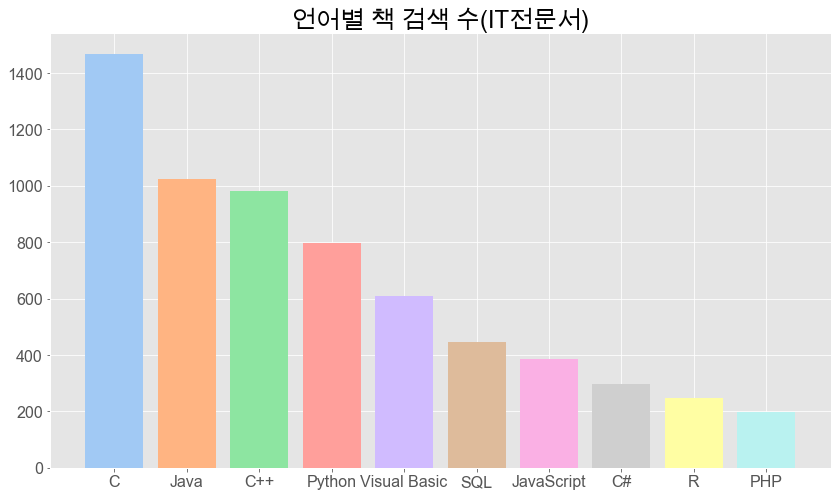

In [1126]:
# 막대 그래프 그리기
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
colors = sns.color_palette('pastel',len(book_num.index))

ax.bar(book_num.index, book_num['책 개수'], color=colors)
plt.title('언어별 책 검색 수(IT전문서)', fontsize=24)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.show()

<br/>

<br/>

# 문제 3) 우리나라 컴퓨터 언어 관련 출판사의 출판된 책의 양 순위

국내출판사
- isbn 코드의 한국번호 '89'
- 97889- | 97989-1

- 출판책개수확인

In [541]:
# condition = result_final['출판사'] in ['IT','컴퓨터','정보','미디어']
# result_final

In [1053]:
# ISBN 코드 중 두번째 줄 선택
result_final['ISBN'][0].split()[1]

'9791165213190'

In [1060]:
for idx, row in result_final.iterrows():
    if row['ISBN'] == '':
        
        print(idx, row['ISBN'], row['출판사'])

3387  에이콘출판


In [1081]:
# 국내 코드가 담긴 데이터 조회(1)
# korea = []
for idx, row in result_final.iterrows():
    if len(row['ISBN'].split()) >= 2:
        if row['ISBN'].split()[1][:5] == '97811': 
        
            print(idx, row['ISBN'], row['출판사'])
#            korea.append(idx)

1673 1185224807 9781185224801 문운당
2688 1185224807 9781185224801 문운당


In [1082]:
# 국내 코드가 담긴 데이터 조회
korea = []
for idx, row in result_final.iterrows():
    
    if row['ISBN'][:2] in ['89','11']: 
#        print(idx, row['ISBN'], row['출판사'])
        korea.append(idx)
korea

5970

In [1083]:
# 국내출판사 출판 책 데이터 개수 확인
len(korea)

5970

In [1085]:
pub_nation = []
for idx, row in result_final.iterrows():
    if row['ISBN'][:2] in ['89','11']:
        pub_nation.append('한국')
    else:
        pub_nation.append('해외')
len(pub_nation)


6456

In [1100]:
result_final['출판국가'] = pub_nation
result_final.head(2)

,제목,출판사,출판일,가격,ISBN,언어,링크,페이지수,출판국가
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,2020-10-30,32000.0,1165213192 9791165213190,Python,http://book.naver.com/bookdb/book_detail.php?b...,640.0,한국
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,2020-10-08,25000.0,8956748578 9788956748573,Python,http://book.naver.com/bookdb/book_detail.php?b...,310.0,한국


In [1076]:
# 국가코드 '89'만 포함했을 때
result_final['출판국가'].value_counts()

한국    4783
해외    1673
Name: 출판국가, dtype: int64

In [1102]:
# 국가코드 '11' 추가 후
pub_nat = result_final['출판국가'].value_counts()
pub_nat = pd.DataFrame(pub_nat)
pub_nat

,출판국가
한국,5970
해외,486


In [1116]:
# 막대 그래프 그리기 함수
def draw_bar(x, y, fig_x, fig_y, title) :
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(fig_x,fig_y))
    ax = fig.add_subplot(111)
    colors = sns.color_palette('pastel',len(y))

    ax.bar(x, y, color=colors)
    plt.title(title, fontsize=20)
    plt.xticks(fontsize=16, weight='bold')
    plt.yticks(fontsize=16, weight='bold')
    plt.show()

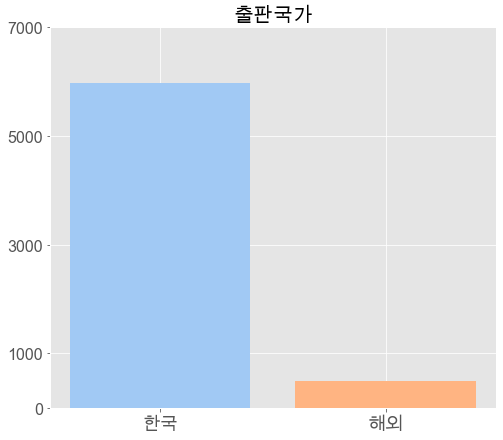

In [1156]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,7))
# ax = fig.add_subplot(111)
colors = sns.color_palette('pastel',len(pub_nat.index))

plt.bar(pub_nat.index, pub_nat['출판국가'], color=colors, align='center')
plt.title('출판국가', fontsize=20)
plt.xticks(fontsize=18, weight='bold')
plt.yticks([0,1000,3000,5000,7000],fontsize=16, weight='bold')
plt.ylim(0,7000)
plt.show()

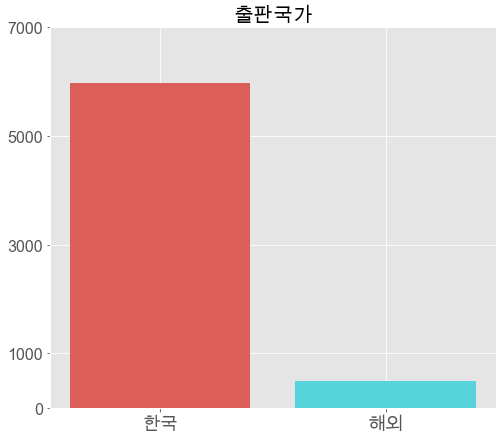

In [1151]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,7))
# ax = fig.add_subplot(111)
colors = sns.color_palette('hls',len(pub_nat.index))

plt.bar(pub_nat.index, pub_nat['출판국가'], color=colors, align='center')
plt.title('출판국가', fontsize=20)
plt.xticks(fontsize=18, weight='bold')
plt.yticks([0,1000,3000,5000,7000],fontsize=16, weight='bold')
plt.ylim(0,7000)
plt.show()

In [1178]:
# 출판사별 데이터 개수 확인

publisher_num = result_final['출판사'].value_counts()
publisher_df = pd.DataFrame(publisher_num)
publisher_df.rename(columns={'출판사':'출판수'},inplace=True)
publisher_df

,출판수
한빛미디어,412
에이콘출판,338
정보문화사,313
영진닷컴,231
Packt(GCOScience),169
...,...
지산사,1
컴퓨터,1
동광출판사,1
성원,1


#### 출판사 raw_data로 그래프 그려보기

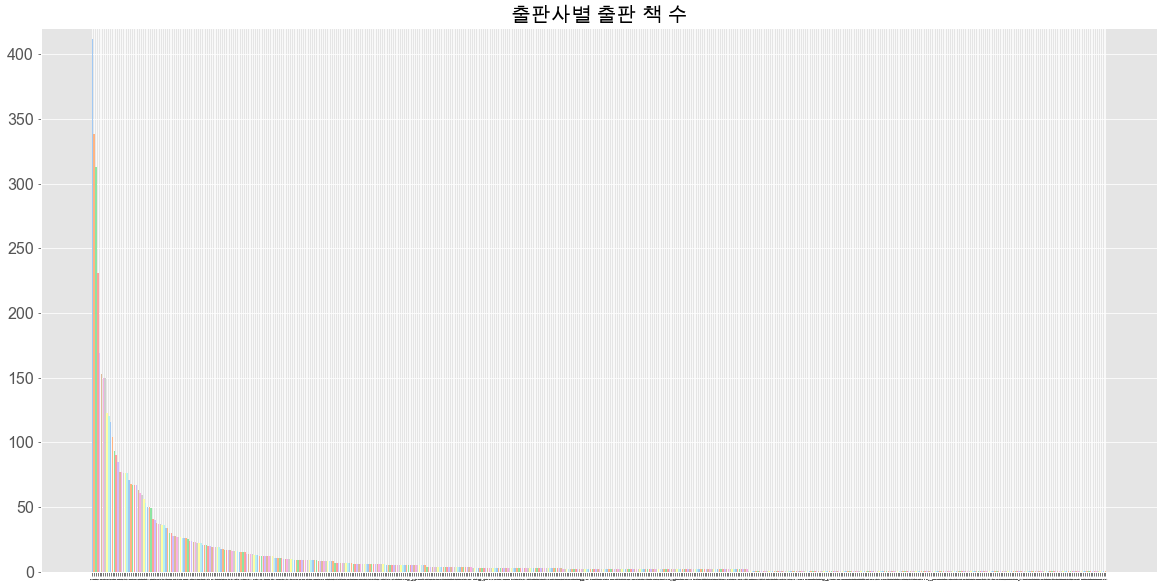

In [1174]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette('pastel')

plt.bar(publisher_df.index, publisher_df['출판사'], color=colors)
plt.title('출판사별 출판 책 수', fontsize=20)
plt.yticks(fontsize=16, weight='bold')
plt.xticks(fontsize=1)
plt.ylim(0,420)
plt.show()

In [1175]:
for idx, row in publisher_df.iterrows():
    row['출판사'] == 1:
    print(publisher_num.index)

IndentationError: expected an indented block (1396648779.py, line 2)

In [1603]:
len(pub_200_book)

4

In [1604]:
# 한 권만 출판한 출판사
pub_5book = []

for idx, row in publisher_df.iterrows():
    if row['출판수'] <= 5: 
        pub_5book.append(idx)
len(pub_5book)

392

In [1199]:
pub_100_book = []

for idx, row in publisher_df.iterrows():
    if row['출판수'] >= 100: 
        pub_100_book.append({
            '출판사' : idx,
            '출판수' : row['출판수']
        })
pub_100_df = pd.DataFrame(pub_100_book)
pub_100_df

,출판사,출판수
0,한빛미디어,412
1,에이콘출판,338
2,정보문화사,313
3,영진닷컴,231
4,Packt(GCOScience),169
5,성안당,153
6,홍릉과학출판사,150
7,인포북,150
8,대림,123
9,위키북스,120


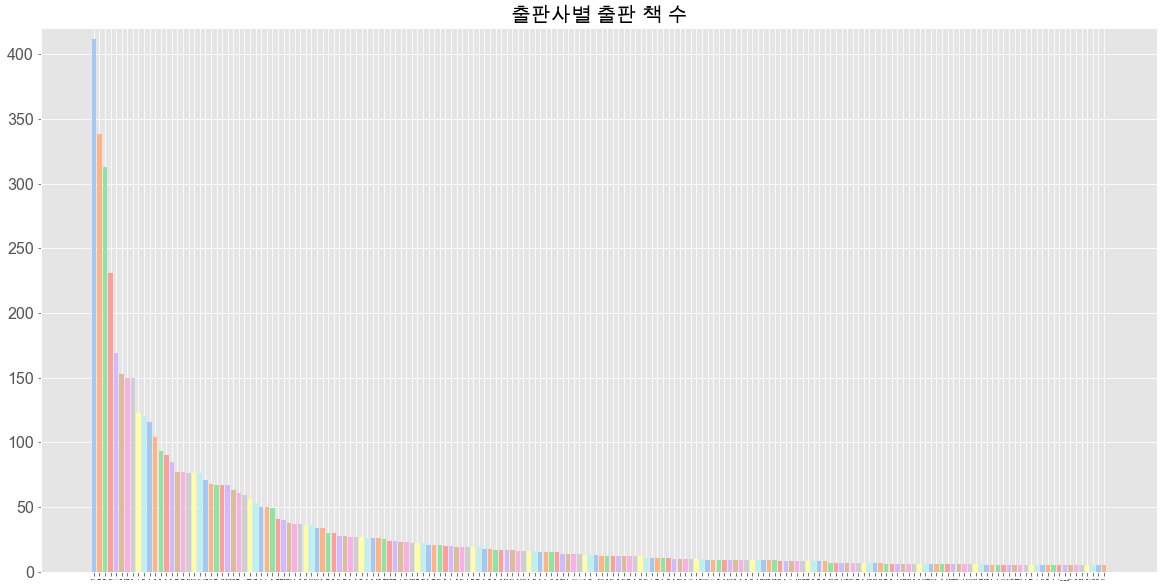

In [1193]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette('pastel')

plt.bar(pub_many_df['출판사'], pub_many_df['출판수'], color=colors)
plt.title('출판사별 출판 책 수', fontsize=20)
plt.yticks(fontsize=16, weight='bold')
plt.xticks(fontsize=1)
plt.ylim(0,420)
plt.show()

In [ ]:
pub_many_df = 

In [1195]:
pub_top10 = pub_100_df.head(10)
pub_top10

,출판사,출판수
0,한빛미디어,412
1,에이콘출판,338
2,정보문화사,313
3,영진닷컴,231
4,Packt(GCOScience),169
5,성안당,153
6,홍릉과학출판사,150
7,인포북,150
8,대림,123
9,위키북스,120


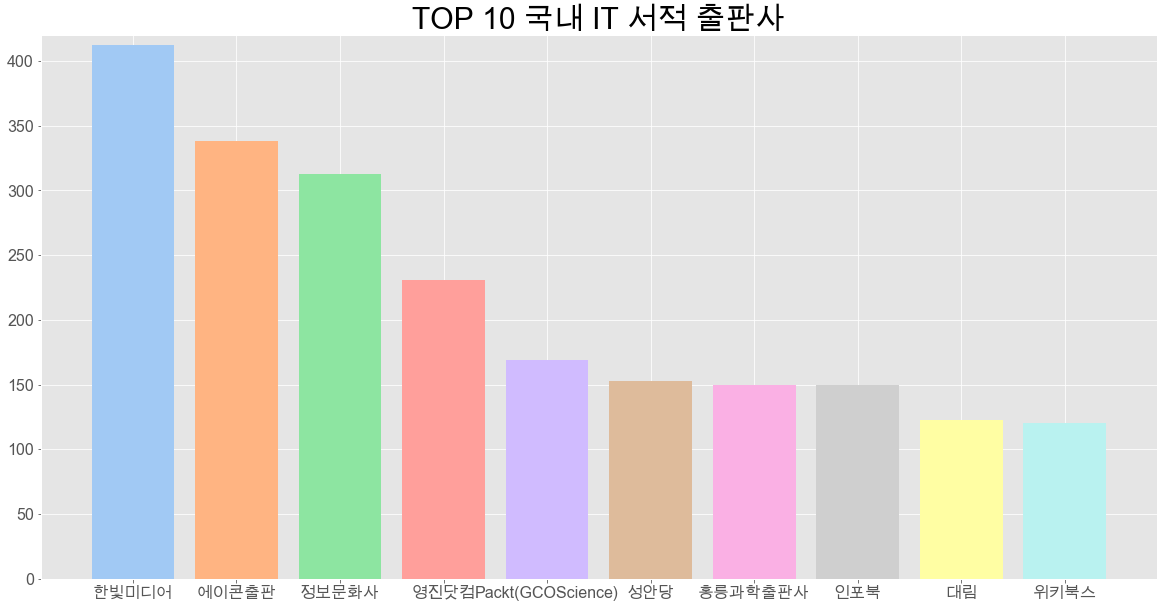

In [1211]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette('pastel')

plt.bar(pub_top10['출판사'], pub_top10['출판수'], color=colors)
plt.title('TOP 10 국내 IT 서적 출판사', fontsize=30)
plt.yticks(fontsize=16, weight='bold')
plt.xticks(fontsize=16)
plt.ylim(0,420)
plt.show()

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette('pastel')

plt.bar(pub_top10['출판사'], pub_top10['출판수'], color=colors)
plt.title('TOP 10 국내 IT 서적 출판사', fontsize=30)
plt.yticks(fontsize=16, weight='bold')
plt.xticks(fontsize=16)
plt.ylim(0,420)
plt.show()

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette('pastel')

plt.bar(publisher_df.index, publisher_df['출판사'], color=colors)
plt.title('출판사별 출판 책 수', fontsize=20)
plt.yticks(fontsize=16, weight='bold')
plt.xticks(fontsize=1)
plt.ylim(0,420)
plt.show()

In [1539]:
publisher_pivot = result_final.pivot_table(index='출판사',columns='언어', values='ISBN',aggfunc=np.count_nonzero)
publisher_pivot

언어,C,C#,C++,Java,JavaScript,PHP,Python,R,SQL,Visual Basic
출판사,,,,,,,,,,
(주)쉬프트웍스,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
(주)화산미디어(월간네트워크타임즈.데이터넷),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21세기사,20.0,2.0,9.0,17.0,4.0,5.0,3.0,NaN,2.0,14.0
ADDISONWESLEY,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Addison-WesleyProfessional,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
휴먼사이언스,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0
휴먼싸이언스,10.0,1.0,2.0,3.0,1.0,NaN,4.0,3.0,NaN,2.0
휴먼컬처아리랑,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [1548]:
publisher_pivot['sum'] = publisher_pivot.sum(1)

In [1555]:
pub_pv = publisher_pivot.sort_values(by='sum',ascending=False).head(15)
pub_pv

언어,C,C#,C++,Java,JavaScript,PHP,Python,R,SQL,Visual Basic,sum
출판사,,,,,,,,,,,
한빛미디어,62.0,23.0,45.0,87.0,49.0,18.0,71.0,9.0,43.0,5.0,412.0
에이콘출판,42.0,23.0,37.0,44.0,35.0,8.0,97.0,40.0,11.0,NaN,337.0
정보문화사,45.0,30.0,51.0,57.0,12.0,14.0,13.0,3.0,31.0,57.0,313.0
영진닷컴,36.0,19.0,38.0,47.0,16.0,4.0,10.0,1.0,25.0,35.0,231.0
Packt(GCOScience),3.0,17.0,20.0,21.0,12.0,1.0,81.0,11.0,3.0,NaN,169.0
성안당,48.0,4.0,35.0,23.0,8.0,2.0,10.0,3.0,5.0,15.0,153.0
홍릉과학출판사,55.0,5.0,22.0,34.0,4.0,3.0,12.0,2.0,6.0,7.0,150.0
인포북,23.0,10.0,49.0,30.0,2.0,2.0,1.0,NaN,6.0,27.0,150.0
대림,14.0,8.0,24.0,32.0,5.0,5.0,NaN,NaN,20.0,15.0,123.0


In [1600]:
# nan값 0으로 처리
pub_pv.fillna(0, inplace=True)
pub_pv

언어,C,C#,C++,Java,JavaScript,PHP,Python,R,SQL,Visual Basic
출판사,,,,,,,,,,
한빛미디어,62.0,23.0,45.0,87.0,49.0,18.0,71.0,9.0,43.0,5.0
에이콘출판,42.0,23.0,37.0,44.0,35.0,8.0,97.0,40.0,11.0,0.0
정보문화사,45.0,30.0,51.0,57.0,12.0,14.0,13.0,3.0,31.0,57.0
영진닷컴,36.0,19.0,38.0,47.0,16.0,4.0,10.0,1.0,25.0,35.0
Packt(GCOScience),3.0,17.0,20.0,21.0,12.0,1.0,81.0,11.0,3.0,0.0
성안당,48.0,4.0,35.0,23.0,8.0,2.0,10.0,3.0,5.0,15.0
홍릉과학출판사,55.0,5.0,22.0,34.0,4.0,3.0,12.0,2.0,6.0,7.0
인포북,23.0,10.0,49.0,30.0,2.0,2.0,1.0,0.0,6.0,27.0
대림,14.0,8.0,24.0,32.0,5.0,5.0,0.0,0.0,20.0,15.0


In [1558]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rc 

plt.rcParams["axes.unicode_minus"] = False 
rc("font", family="Arial Unicode MS") # Windows: Malgun Gothic 
# %matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

In [1599]:
pub_col = list(tiobe['language'])
pub_col

['Python',
 'C',
 'Java',
 'C++',
 'C#',
 'Visual Basic',
 'JavaScript',
 'SQL',
 'PHP',
 'R']

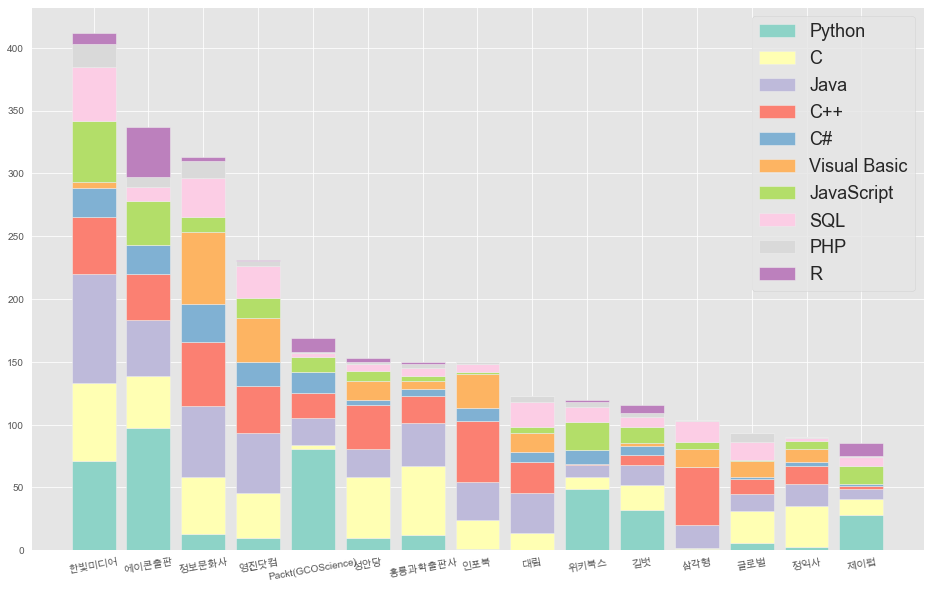

In [1895]:
## 이...이게 되네...! 한번에 성공,,,,얼떨떨,,,,

plt.style.use('ggplot')
fig = plt.figure(figsize=(16,10))
colors = sns.color_palette('Set3',10)


bott = 0
n = 0
for col in pub_col:
    plt.bar(pub_pv.index, pub_pv[col], color=colors[n], bottom=bott, label=col)
    n += 1
    bott += pub_pv[col]
plt.legend(loc='upper right',fontsize=18)
plt.xticks(rotation=10)
# plt.xlabel(fontsize=12)
plt.show();


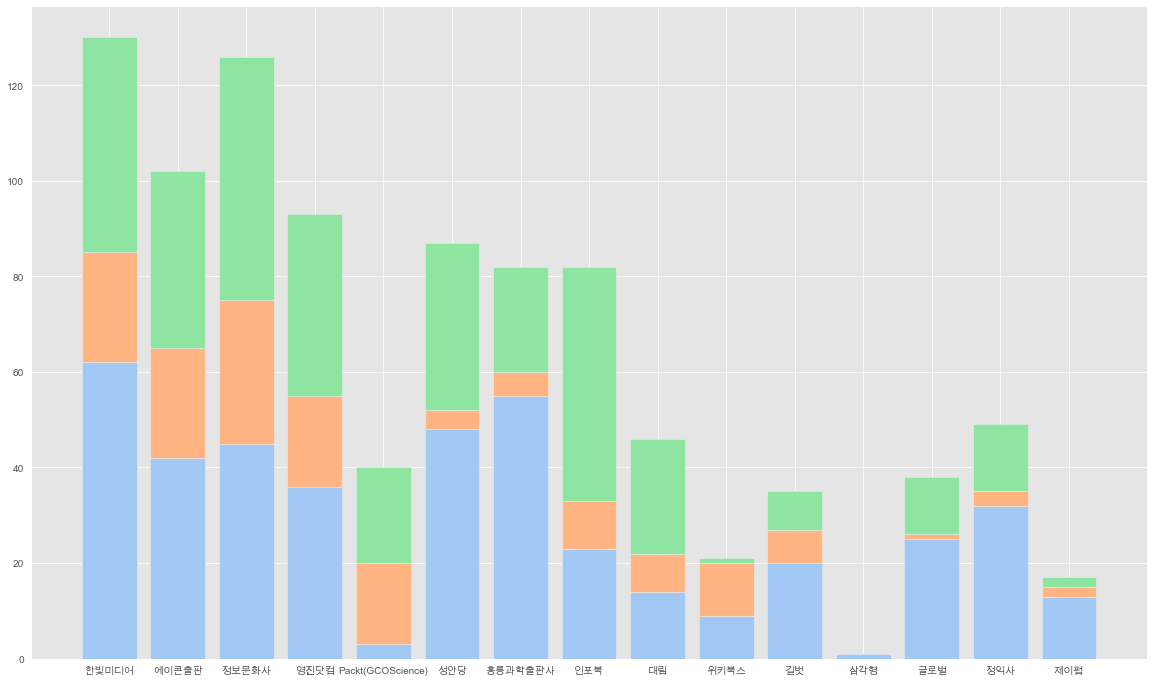

In [1569]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,12))
colors = sns.color_palette('pastel',10)

plt.bar(pub_pv.index, pub_pv['C'], color=colors[0])
plt.bar(pub_pv.index, pub_pv['C#'], color=colors[1], bottom=pub_pv['C'])
plt.bar(pub_pv.index, pub_pv['C++'], color=colors[2], bottom=pub_pv['C']+pub_pv['C#'])
plt.bar(pub_pv.index, pub_pv['Java'], color=colors[3], bottom=pub_pv['C']+pub_pv['C#']+pub_pv['C++'])
plt.bar(pub_pv.index, pub_pv['JavaScript'], color=colors[4], bottom=pub_pv['C']+pub_pv['C#']+pub_pv['C++']+pub_pv['Java'])
# plt.bar(pub_pv.index, pub_pv['JavaScript'], color=colors[4])
# plt.bar(pub_pv.index, pub_pv['PHP'], color=colors[5])
# plt.bar(pub_pv.index, pub_pv['Python'], color=colors[6])
# plt.bar(pub_pv.index, pub_pv['SQL'], color=colors[7])
# plt.bar(pub_pv.index, pub_pv['VisualBasic'], color=colors[8])
# plt.bar(pub_pv.index, pub_pv['R'], color=colors[9])

# plt.title('국내 IT 서적 출판사별 프로그래밍 언어 출판물 비교', fontsize=30)
# plt.yticks(fontsize=16, weight='bold')
# plt.xticks(fontsize=16)
# plt.ylim(0,420)
plt.show()

In [1566]:
# plt.plot(data=result_final, x=result_final['출판사']kind='barh',figsize=(10,8), stacked=True, alpha=0.7)


### 상위 4개 출판사의 인기 언어별 출판량 분석해보기

In [1182]:
pub_1book

['글봄크리에이티브',
 '밴프레스',
 '에이콘출판사',
 '이지퍼블리싱',
 '한림미디어',
 'ADDISONWESLEY',
 '(주)쉬프트웍스',
 '어포스트',
 '위드클라우드',
 'Wrox',
 '밉스',
 '비제이퍼블릭(BJ퍼블릭)',
 'PearsonEducationAsia',
 '위저드',
 '비트북스(비아이티출판(BIT))',
 '노트펍스',
 '충북대학교출판부(CBNUPRESS)',
 '한국데이터진흥원',
 '세종서적',
 '비트북스',
 '책장',
 '미광(테크미디어)',
 '시사영어사',
 '드림북',
 '들꽃누리',
 '책밥',
 'PrenticeHallPTR',
 'Prentice-Hall',
 '대유학당',
 '달무리',
 '두남',
 '심통',
 '시대에듀',
 '한울아카데미',
 '서울경제경영',
 '사회평론아카데미',
 '이앤비플러스',
 '조선대학교출판부',
 '문예마당',
 '현문사',
 '에듀컨텐츠휴피아',
 '에듀박스',
 '미래웹기술연구소',
 '뉴런',
 '교우사(교재)',
 'GLOBAL',
 '율곡출판사',
 '형설',
 '한울(한울아카데미)',
 '푸른길',
 '삼영사',
 '북웨이',
 '다락원',
 '한국방송통신대학교',
 '정보M&B',
 '한국학술정보',
 '한국방송통신대학교출판문화원',
 '인투북스',
 '대웅미디어',
 'McGraw-Hill',
 '으뜸정보교육출판',
 '비투엔컨설팅',
 '제이에스팩토리',
 '도서출판N1',
 '오픈이지북스',
 '다산서고',
 '제이앤씨커뮤니티',
 '공동체',
 '보명BOOKS',
 '학문사닷컴',
 '교문사',
 '비비컴',
 '피씨북(PCBOOK)',
 '엠플래닝',
 '한나래',
 '웹액츄얼리코리아',
 '업투데이트북스',
 '한컴리눅스',
 'HSMEDIA',
 '삼육대학교출판부',
 '계명대학교출판부',
 '아이캔디',
 '일일사',
 '아이생각(디지털북스)',
 '북두',
 '명진도서출판',
 '이십일세기사',
 'SSUPRESS',
 '(주)화산미

---

## 문제 4) 출판일 기준 최근 2년(20-21) 데이터와 그 전 3년(17-19)데이터를 비교 & 시각화

In [1618]:
len(result_20_21), len(result_17_19)

(568, 5888)

In [1700]:
result_year = result_final.loc[result_final['출판일']>='20170101']

In [1701]:
len(result_year)

1607

In [1702]:
result_year.head()

,제목,출판사,출판일,Price,ISBN,언어,링크,Pages,출판국가
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,2020-10-30,32000.0,1165213192 9791165213190,Python,http://book.naver.com/bookdb/book_detail.php?b...,640.0,한국
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,2020-10-08,25000.0,8956748578 9788956748573,Python,http://book.naver.com/bookdb/book_detail.php?b...,310.0,한국
2,파이썬 딥러닝 텐서플로 (Python Deep Learning TensorFlow),정보문화사,2021-06-30,27000.0,8956749094 9788956749099,Python,http://book.naver.com/bookdb/book_detail.php?b...,432.0,한국
3,파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...,정보문화사,2021-01-05,25000.0,8956749000 9788956749006,Python,http://book.naver.com/bookdb/book_detail.php?b...,304.0,한국
4,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,2021-02-25,26000.0,118557879X 9791185578798,Python,http://book.naver.com/bookdb/book_detail.php?b...,368.0,한국


In [1703]:
len(result_year['출판일'].unique())

766

In [1704]:
result_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607 entries, 0 to 6364
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   제목      1607 non-null   object        
 1   출판사     1607 non-null   object        
 2   출판일     1607 non-null   datetime64[ns]
 3   Price   1607 non-null   float64       
 4   ISBN    1607 non-null   object        
 5   언어      1607 non-null   object        
 6   링크      1607 non-null   object        
 7   Pages   1607 non-null   float64       
 8   출판국가    1607 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 125.5+ KB


In [1719]:
# 20-21년도 데이터셋
result_20_21 = result_final.loc[result_final['출판일']>='20200101']
result_20_21

,제목,출판사,출판일,Price,ISBN,언어,링크,Pages,출판국가
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,2020-10-30,32000.0,1165213192 9791165213190,Python,http://book.naver.com/bookdb/book_detail.php?b...,640.0,한국
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,2020-10-08,25000.0,8956748578 9788956748573,Python,http://book.naver.com/bookdb/book_detail.php?b...,310.0,한국
2,파이썬 딥러닝 텐서플로 (Python Deep Learning TensorFlow),정보문화사,2021-06-30,27000.0,8956749094 9788956749099,Python,http://book.naver.com/bookdb/book_detail.php?b...,432.0,한국
3,파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...,정보문화사,2021-01-05,25000.0,8956749000 9788956749006,Python,http://book.naver.com/bookdb/book_detail.php?b...,304.0,한국
4,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,2021-02-25,26000.0,118557879X 9791185578798,Python,http://book.naver.com/bookdb/book_detail.php?b...,368.0,한국
...,...,...,...,...,...,...,...,...,...
6273,HTML&자바스크립트&CSS(예제중심) (for 초급&중급),현우사,2020-02-25,23000.0,8980815603 9788980815609,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,414.0,한국
6277,Vue.js 개발을 위한 모던 자바스크립트,온노트,2020-11-09,8000.0,1190230143 9791190230148,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국
6283,리액트 개발을 위한 모던 자바스크립트,온노트,2020-09-07,8000.0,1190230135 9791190230131,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국
6287,ES6로 기초부터 다시 배우는 자바스크립트 파워북,어포스트,2020-08-13,19500.0,119712280X 9791197122804,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,442.0,한국


In [1654]:
# 17-19년도 데이터셋
result_17_19 = result_final.loc[result_final['출판일']>='20170101']
result_17_19

,제목,출판사,출판일,Price,ISBN,언어,링크,Pages,출판국가
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,2020-10-30,32000.0,1165213192 9791165213190,Python,http://book.naver.com/bookdb/book_detail.php?b...,640.0,한국
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,2020-10-08,25000.0,8956748578 9788956748573,Python,http://book.naver.com/bookdb/book_detail.php?b...,310.0,한국
2,파이썬 딥러닝 텐서플로 (Python Deep Learning TensorFlow),정보문화사,2021-06-30,27000.0,8956749094 9788956749099,Python,http://book.naver.com/bookdb/book_detail.php?b...,432.0,한국
3,파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...,정보문화사,2021-01-05,25000.0,8956749000 9788956749006,Python,http://book.naver.com/bookdb/book_detail.php?b...,304.0,한국
4,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,2021-02-25,26000.0,118557879X 9791185578798,Python,http://book.naver.com/bookdb/book_detail.php?b...,368.0,한국
...,...,...,...,...,...,...,...,...,...
6327,실전 자바스크립트 디자인 패턴,온노트,2019-08-05,8000.0,1190230011 9791190230018,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국
6332,"Try! helloworld 자바스크립트 (하루 15분, 누구나 프로그래밍을 할 수...",길벗,2018-05-08,22000.0,1160504733 9791160504736,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,336.0,한국
6350,BBC micro:bit 프로그래밍 with 자바스크립트 블록 에디터 (사물인터넷을...,제이펍,2017-09-25,28000.0,1185890955 9791185890951,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,432.0,한국
6361,자바스크립트 + 제이쿼리 입문 (예제로 자바스크립트 & jQuery 정복하기),인포앤북,2021-11-01,25000.0,1192038002 9791192038001,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,464.0,한국


In [1655]:
result_17_19 = result_17_19.loc[result_17_19['출판일']<='20191231']
result_17_19

,제목,출판사,출판일,Price,ISBN,언어,링크,Pages,출판국가
10,초보자를 위한 파이썬 200제 (Python),정보문화사,2017-02-27,20000.0,8956747342 9788956747347,Python,http://book.naver.com/bookdb/book_detail.php?b...,376.0,한국
15,데이터를 다루며 배우는 파이썬 (Python for Everybody),인사이트,2019-08-22,18000.0,8966262481 9788966262489,Python,http://book.naver.com/bookdb/book_detail.php?b...,290.0,한국
19,파이썬 1학년 (Python),성안당,2018-12-18,17000.0,8931555687 9788931555684,Python,http://book.naver.com/bookdb/book_detail.php?b...,192.0,한국
21,최적합 전문코딩능력평가 COS PRO 2급 Python,성안당,2019-04-24,22000.0,8931555636 9788931555639,Python,http://book.naver.com/bookdb/book_detail.php?b...,328.0,한국
23,이공학도를 위한 수치해석 (Python 으로 코딩하기),학산미디어,2019-05-20,30000.0,1185294279 9791185294278,Python,http://book.naver.com/bookdb/book_detail.php?b...,455.0,한국
...,...,...,...,...,...,...,...,...,...
6325,실전 자바스크립트 디자인 패턴 ES6편,온노트,2019-08-12,8000.0,119023002X 9791190230025,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국
6327,실전 자바스크립트 디자인 패턴,온노트,2019-08-05,8000.0,1190230011 9791190230018,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국
6332,"Try! helloworld 자바스크립트 (하루 15분, 누구나 프로그래밍을 할 수...",길벗,2018-05-08,22000.0,1160504733 9791160504736,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,336.0,한국
6350,BBC micro:bit 프로그래밍 with 자바스크립트 블록 에디터 (사물인터넷을...,제이펍,2017-09-25,28000.0,1185890955 9791185890951,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,432.0,한국


In [1656]:
# 책 개수 데이터 프레임으로 저장(17-19)
book_1719 = result_17_19['언어'].value_counts()
book_1719 = pd.DataFrame(book_1719)
book_1719.reset_index(inplace=True)
book_1719.rename(columns={'언어':'17-19','index':'언어'},inplace=True)
book_1719

,언어,17-19
0,Python,389
1,C,138
2,Java,122
3,R,120
4,C++,73
5,JavaScript,69
6,SQL,57
7,C#,43
8,PHP,20
9,Visual Basic,8


In [1657]:
# 책 개수 데이터 프레임으로 저장(20-21)
book_2021 = result_20_21['언어'].value_counts()
book_2021 = pd.DataFrame(book_2021)
book_2021.reset_index(inplace=True)
book_2021.rename(columns={'언어':'20-21','index':'언어'},inplace=True)
book_2021

,언어,20-21
0,Python,281
1,R,62
2,C,58
3,SQL,39
4,Java,39
5,C++,31
6,JavaScript,27
7,C#,21
8,PHP,7
9,Visual Basic,3


In [1658]:
book_year = pd.merge(book_1719,book_2021,how='left',on='언어')
book_year

,언어,17-19,20-21
0,Python,389,281
1,C,138,58
2,Java,122,39
3,R,120,62
4,C++,73,31
5,JavaScript,69,27
6,SQL,57,39
7,C#,43,21
8,PHP,20,7
9,Visual Basic,8,3


In [1659]:
book_year.sort_values(by='20-21',ascending=False)

,언어,17-19,20-21
0,Python,389,281
3,R,120,62
1,C,138,58
2,Java,122,39
6,SQL,57,39
4,C++,73,31
5,JavaScript,69,27
7,C#,43,21
8,PHP,20,7
9,Visual Basic,8,3


In [1660]:
book_year.sort_values(by='17-19',ascending=False)

,언어,17-19,20-21
0,Python,389,281
1,C,138,58
2,Java,122,39
3,R,120,62
4,C++,73,31
5,JavaScript,69,27
6,SQL,57,39
7,C#,43,21
8,PHP,20,7
9,Visual Basic,8,3


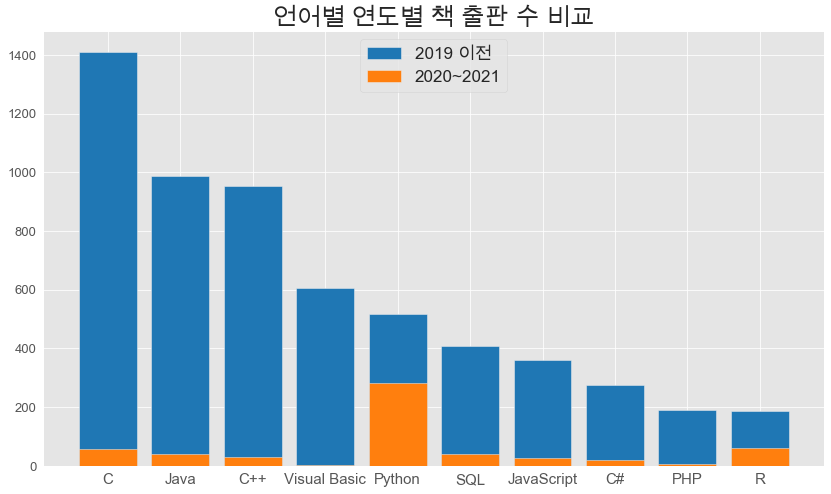

In [1653]:
# 막대 그래프 그리기
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
#colors = sns.color_palette('Pastel1')
ax.bar(book_year['언어'], book_year['17-19'], color='tab:blue',label='2019 이전')
ax.bar(book_year['언어'], book_year['20-21'],  color='tab:orange',label='2020~2021')
plt.title('언어별 연도별 책 출판 수 비교', fontsize=24)
plt.legend(loc='upper center', fontsize=17)
plt.xticks(fontsize=15, weight='bold')
plt.yticks(fontsize=13, )
plt.show()

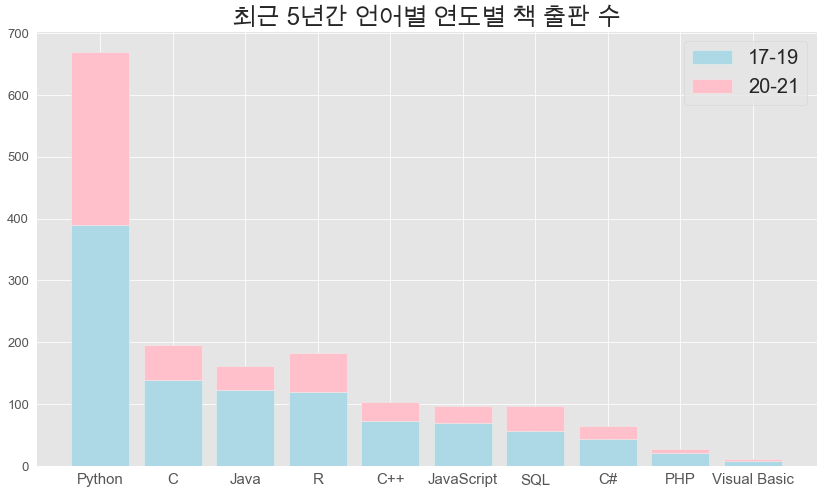

In [1661]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

ax.bar(book_year['언어'], book_year['17-19'], color='lightblue',label='17-19')
ax.bar(book_year['언어'], book_year['20-21'], color='pink', label='20-21', bottom=book_year['17-19'])
plt.title('최근 5년간 언어별 연도별 책 출판 수', fontsize=24)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=15, weight='bold')
plt.yticks(fontsize=13,)
plt.show()

In [1691]:
result_17_21.head()

,제목,출판사,출판일,Price,ISBN,언어,링크,Pages,출판국가
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,2020-10-30,32000.0,1165213192 9791165213190,Python,http://book.naver.com/bookdb/book_detail.php?b...,640.0,한국
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,2020-10-08,25000.0,8956748578 9788956748573,Python,http://book.naver.com/bookdb/book_detail.php?b...,310.0,한국
2,파이썬 딥러닝 텐서플로 (Python Deep Learning TensorFlow),정보문화사,2021-06-30,27000.0,8956749094 9788956749099,Python,http://book.naver.com/bookdb/book_detail.php?b...,432.0,한국
3,파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...,정보문화사,2021-01-05,25000.0,8956749000 9788956749006,Python,http://book.naver.com/bookdb/book_detail.php?b...,304.0,한국
4,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,2021-02-25,26000.0,118557879X 9791185578798,Python,http://book.naver.com/bookdb/book_detail.php?b...,368.0,한국


<br/>

In [1710]:
len(result_17_19), len(result_20_21)

(1039, 568)

In [1720]:
result_20_21['연도'] = '최근 2년'
result_20_21.tail()

,제목,출판사,출판일,Price,ISBN,언어,링크,Pages,출판국가,연도
6273,HTML&자바스크립트&CSS(예제중심) (for 초급&중급),현우사,2020-02-25,23000.0,8980815603 9788980815609,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,414.0,한국,최근 2년
6277,Vue.js 개발을 위한 모던 자바스크립트,온노트,2020-11-09,8000.0,1190230143 9791190230148,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국,최근 2년
6283,리액트 개발을 위한 모던 자바스크립트,온노트,2020-09-07,8000.0,1190230135 9791190230131,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국,최근 2년
6287,ES6로 기초부터 다시 배우는 자바스크립트 파워북,어포스트,2020-08-13,19500.0,119712280X 9791197122804,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,442.0,한국,최근 2년
6361,자바스크립트 + 제이쿼리 입문 (예제로 자바스크립트 & jQuery 정복하기),인포앤북,2021-11-01,25000.0,1192038002 9791192038001,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,464.0,한국,최근 2년


In [1721]:
result_17_19['연도'] = '17-19년'
result_17_19.tail()

,제목,출판사,출판일,Price,ISBN,언어,링크,Pages,출판국가,연도
6325,실전 자바스크립트 디자인 패턴 ES6편,온노트,2019-08-12,8000.0,119023002X 9791190230025,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국,17-19년
6327,실전 자바스크립트 디자인 패턴,온노트,2019-08-05,8000.0,1190230011 9791190230018,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국,17-19년
6332,"Try! helloworld 자바스크립트 (하루 15분, 누구나 프로그래밍을 할 수...",길벗,2018-05-08,22000.0,1160504733 9791160504736,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,336.0,한국,17-19년
6350,BBC micro:bit 프로그래밍 with 자바스크립트 블록 에디터 (사물인터넷을...,제이펍,2017-09-25,28000.0,1185890955 9791185890951,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,432.0,한국,17-19년
6364,실전 개발을 위한 객체 지향 자바스크립트,온노트,2018-09-27,5000.0,1195403925 9791195403929,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국,17-19년


In [1722]:
result_year = pd.concat([result_17_19,result_20_21])
result_year

,제목,출판사,출판일,Price,ISBN,언어,링크,Pages,출판국가,연도
10,초보자를 위한 파이썬 200제 (Python),정보문화사,2017-02-27,20000.0,8956747342 9788956747347,Python,http://book.naver.com/bookdb/book_detail.php?b...,376.0,한국,17-19년
15,데이터를 다루며 배우는 파이썬 (Python for Everybody),인사이트,2019-08-22,18000.0,8966262481 9788966262489,Python,http://book.naver.com/bookdb/book_detail.php?b...,290.0,한국,17-19년
19,파이썬 1학년 (Python),성안당,2018-12-18,17000.0,8931555687 9788931555684,Python,http://book.naver.com/bookdb/book_detail.php?b...,192.0,한국,17-19년
21,최적합 전문코딩능력평가 COS PRO 2급 Python,성안당,2019-04-24,22000.0,8931555636 9788931555639,Python,http://book.naver.com/bookdb/book_detail.php?b...,328.0,한국,17-19년
23,이공학도를 위한 수치해석 (Python 으로 코딩하기),학산미디어,2019-05-20,30000.0,1185294279 9791185294278,Python,http://book.naver.com/bookdb/book_detail.php?b...,455.0,한국,17-19년
...,...,...,...,...,...,...,...,...,...,...
6273,HTML&자바스크립트&CSS(예제중심) (for 초급&중급),현우사,2020-02-25,23000.0,8980815603 9788980815609,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,414.0,한국,최근 2년
6277,Vue.js 개발을 위한 모던 자바스크립트,온노트,2020-11-09,8000.0,1190230143 9791190230148,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국,최근 2년
6283,리액트 개발을 위한 모던 자바스크립트,온노트,2020-09-07,8000.0,1190230135 9791190230131,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0.0,한국,최근 2년
6287,ES6로 기초부터 다시 배우는 자바스크립트 파워북,어포스트,2020-08-13,19500.0,119712280X 9791197122804,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,442.0,한국,최근 2년


In [8]:
publisher_year = result_year.pivot_table(index='출판사',columns=['연도','언어'], values='ISBN',aggfunc=np.count_nonzero)
publisher_year.fillna(0,inplace=True)
publisher_year

NameError: name 'result_year' is not defined

In [1728]:
# 정렬을 위해 sum컬럼 추가
publisher_year['sum'] = publisher_year.sum(1)
publisher_year

연도                       17-19년                                             \
언어                            C   C#  C++ Java JavaScript  PHP Python    R   
출판사                                                                          
(주)화산미디어(월간네트워크타임즈.데이터넷)    0.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0   
21세기사                       2.0  0.0  0.0  4.0        1.0  1.0    2.0  0.0   
BOOKK(부크크)                  0.0  0.0  0.0  1.0        0.0  0.0    2.0  0.0   
DK로드북스                      0.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0   
J&H                         0.0  0.0  0.0  1.0        0.0  0.0    2.0  0.0   
...                         ...  ...  ...  ...        ...  ...    ...  ...   
홍릉                          0.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0   
홍릉(홍릉과학출판사)                 0.0  0.0  0.0  1.0        0.0  0.0    1.0  0.0   
홍릉과학출판사                     2.0  0.0  0.0  2.0        0.0  0.0    9.0  2.0   
황소걸음아카데미                    0.0  0.0  0.0  0.0        0.0  0.0    0.0  1.0   
휴먼싸이언스                      3.0  0.0  1.0  0.0        0.0  0.0    3.0  2.0   

연도                                          ... 최근 2년                       \
언어                        SQL Visual Basic  ...    C#  C++ Java JavaScript   
출판사                                         ...                              
(주)화산미디어(월간네트워크타임즈.데이터넷)  0.0          0.0  ...   0.0  0.0  0.0        0.0   
21세기사                     0.0          0.0  ...   0.0  0.0  1.0        1.0   
BOOKK(부크크)                0.0          0.0  ...   0.0  0.0  0.0        0.0   
DK로드북스                    0.0          0.0  ...   0.0  0.0  0.0        0.0   
J&H                       0.0          0.0  ...   0.0  0.0  0.0        0.0   
...                       ...          ...  ...   ...  ...  ...        ...   
홍릉                        1.0          0.0  ...   0.0  0.0  1.0        0.0   
홍릉(홍릉과학출판사)               0.0          0.0  ...   0.0  0.0  0.0        0.0   
홍릉과학출판사                   0.0          0.0  ...   0.0  0.0  0.0        1.0   
황소걸음아카데미                  0.0          0.0  ...   1.0  0.0  0.0        0.0   
휴먼싸이언스                    0.0          0.0  ...   0.0  0.0  0.0        0.0   

연도                                                            sum  
언어                        PHP Python    R  SQL Visual Basic        
출판사                                                                
(주)화산미디어(월간네트워크타임즈.데이터넷)  0.0    0.0  0.0  0.0          0.0   1.0  
21세기사                     0.0    1.0  0.0  0.0          0.0  14.0  
BOOKK(부크크)                0.0    2.0  0.0  0.0          0.0   5.0  
DK로드북스                    0.0    2.0  0.0  0.0          0.0   2.0  
J&H                       0.0    2.0  0.0  0.0          0.0   5.0  
...                       ...    ...  ...  ...          ...   ...  
홍릉                        0.0    7.0  0.0  0.0          0.0  10.0  
홍릉(홍릉과학출판사)               0.0    1.0  0.0  0.0          0.0   4.0  
홍릉과학출판사                   0.0    2.0  0.0  0.0          0.0  18.0  
황소걸음아카데미                  0.0    0.0  2.0  0.0          0.0   5.0  
휴먼싸이언스                    0.0    1.0  1.0  0.0          0.0  12.0  

[219 rows x 21 columns]

In [1775]:
# 17-19년 
pv_1719 = publisher_year[publisher_year.columns[0:10]]
pv_1719

연도                       17-19년                                             \
언어                            C   C#  C++ Java JavaScript  PHP Python    R   
출판사                                                                          
(주)화산미디어(월간네트워크타임즈.데이터넷)    0.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0   
21세기사                       2.0  0.0  0.0  4.0        1.0  1.0    2.0  0.0   
BOOKK(부크크)                  0.0  0.0  0.0  1.0        0.0  0.0    2.0  0.0   
DK로드북스                      0.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0   
J&H                         0.0  0.0  0.0  1.0        0.0  0.0    2.0  0.0   
...                         ...  ...  ...  ...        ...  ...    ...  ...   
홍릉                          0.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0   
홍릉(홍릉과학출판사)                 0.0  0.0  0.0  1.0        0.0  0.0    1.0  0.0   
홍릉과학출판사                     2.0  0.0  0.0  2.0        0.0  0.0    9.0  2.0   
황소걸음아카데미                    0.0  0.0  0.0  0.0        0.0  0.0    0.0  1.0   
휴먼싸이언스                      3.0  0.0  1.0  0.0        0.0  0.0    3.0  2.0   

연도                                          
언어                        SQL Visual Basic  
출판사                                         
(주)화산미디어(월간네트워크타임즈.데이터넷)  0.0          0.0  
21세기사                     0.0          0.0  
BOOKK(부크크)                0.0          0.0  
DK로드북스                    0.0          0.0  
J&H                       0.0          0.0  
...                       ...          ...  
홍릉                        1.0          0.0  
홍릉(홍릉과학출판사)               0.0          0.0  
홍릉과학출판사                   0.0          0.0  
황소걸음아카데미                  0.0          0.0  
휴먼싸이언스                    0.0          0.0  

[219 rows x 10 columns]

In [1776]:
pv_2021 = publisher_year[publisher_year.columns[10:20]]
pv_2021

연도                       최근 2년                                             \
언어                           C   C#  C++ Java JavaScript  PHP Python    R   
출판사                                                                         
(주)화산미디어(월간네트워크타임즈.데이터넷)   1.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0   
21세기사                      1.0  0.0  0.0  1.0        1.0  0.0    1.0  0.0   
BOOKK(부크크)                 0.0  0.0  0.0  0.0        0.0  0.0    2.0  0.0   
DK로드북스                     0.0  0.0  0.0  0.0        0.0  0.0    2.0  0.0   
J&H                        0.0  0.0  0.0  0.0        0.0  0.0    2.0  0.0   
...                        ...  ...  ...  ...        ...  ...    ...  ...   
홍릉                         1.0  0.0  0.0  1.0        0.0  0.0    7.0  0.0   
홍릉(홍릉과학출판사)                1.0  0.0  0.0  0.0        0.0  0.0    1.0  0.0   
홍릉과학출판사                    0.0  0.0  0.0  0.0        1.0  0.0    2.0  0.0   
황소걸음아카데미                   1.0  1.0  0.0  0.0        0.0  0.0    0.0  2.0   
휴먼싸이언스                     1.0  0.0  0.0  0.0        0.0  0.0    1.0  1.0   

연도                                          
언어                        SQL Visual Basic  
출판사                                         
(주)화산미디어(월간네트워크타임즈.데이터넷)  0.0          0.0  
21세기사                     0.0          0.0  
BOOKK(부크크)                0.0          0.0  
DK로드북스                    0.0          0.0  
J&H                       0.0          0.0  
...                       ...          ...  
홍릉                        0.0          0.0  
홍릉(홍릉과학출판사)               0.0          0.0  
홍릉과학출판사                   0.0          0.0  
황소걸음아카데미                  0.0          0.0  
휴먼싸이언스                    0.0          0.0  

[219 rows x 10 columns]

In [1777]:
pv_1719['sum'] = pv_1719.sum(1)
pv_1719

연도                       17-19년                                             \
언어                            C   C#  C++ Java JavaScript  PHP Python    R   
출판사                                                                          
(주)화산미디어(월간네트워크타임즈.데이터넷)    0.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0   
21세기사                       2.0  0.0  0.0  4.0        1.0  1.0    2.0  0.0   
BOOKK(부크크)                  0.0  0.0  0.0  1.0        0.0  0.0    2.0  0.0   
DK로드북스                      0.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0   
J&H                         0.0  0.0  0.0  1.0        0.0  0.0    2.0  0.0   
...                         ...  ...  ...  ...        ...  ...    ...  ...   
홍릉                          0.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0   
홍릉(홍릉과학출판사)                 0.0  0.0  0.0  1.0        0.0  0.0    1.0  0.0   
홍릉과학출판사                     2.0  0.0  0.0  2.0        0.0  0.0    9.0  2.0   
황소걸음아카데미                    0.0  0.0  0.0  0.0        0.0  0.0    0.0  1.0   
휴먼싸이언스                      3.0  0.0  1.0  0.0        0.0  0.0    3.0  2.0   

연도                                           sum  
언어                        SQL Visual Basic        
출판사                                               
(주)화산미디어(월간네트워크타임즈.데이터넷)  0.0          0.0   0.0  
21세기사                     0.0          0.0  10.0  
BOOKK(부크크)                0.0          0.0   3.0  
DK로드북스                    0.0          0.0   0.0  
J&H                       0.0          0.0   3.0  
...                       ...          ...   ...  
홍릉                        1.0          0.0   1.0  
홍릉(홍릉과학출판사)               0.0          0.0   2.0  
홍릉과학출판사                   0.0          0.0  15.0  
황소걸음아카데미                  0.0          0.0   1.0  
휴먼싸이언스                    0.0          0.0   9.0  

[219 rows x 11 columns]

In [1778]:
pv_2021['sum'] = pv_2021.sum(1)
pv_2021

연도                       최근 2년                                             \
언어                           C   C#  C++ Java JavaScript  PHP Python    R   
출판사                                                                         
(주)화산미디어(월간네트워크타임즈.데이터넷)   1.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0   
21세기사                      1.0  0.0  0.0  1.0        1.0  0.0    1.0  0.0   
BOOKK(부크크)                 0.0  0.0  0.0  0.0        0.0  0.0    2.0  0.0   
DK로드북스                     0.0  0.0  0.0  0.0        0.0  0.0    2.0  0.0   
J&H                        0.0  0.0  0.0  0.0        0.0  0.0    2.0  0.0   
...                        ...  ...  ...  ...        ...  ...    ...  ...   
홍릉                         1.0  0.0  0.0  1.0        0.0  0.0    7.0  0.0   
홍릉(홍릉과학출판사)                1.0  0.0  0.0  0.0        0.0  0.0    1.0  0.0   
홍릉과학출판사                    0.0  0.0  0.0  0.0        1.0  0.0    2.0  0.0   
황소걸음아카데미                   1.0  1.0  0.0  0.0        0.0  0.0    0.0  2.0   
휴먼싸이언스                     1.0  0.0  0.0  0.0        0.0  0.0    1.0  1.0   

연도                                          sum  
언어                        SQL Visual Basic       
출판사                                              
(주)화산미디어(월간네트워크타임즈.데이터넷)  0.0          0.0  1.0  
21세기사                     0.0          0.0  4.0  
BOOKK(부크크)                0.0          0.0  2.0  
DK로드북스                    0.0          0.0  2.0  
J&H                       0.0          0.0  2.0  
...                       ...          ...  ...  
홍릉                        0.0          0.0  9.0  
홍릉(홍릉과학출판사)               0.0          0.0  2.0  
홍릉과학출판사                   0.0          0.0  3.0  
황소걸음아카데미                  0.0          0.0  4.0  
휴먼싸이언스                    0.0          0.0  3.0  

[219 rows x 11 columns]

In [1779]:
pv_2021.columns = pv_2021.columns.get_level_values(0) + ' ' + pv_2021.columns.get_level_values(1)

In [1780]:
pv_1719.columns = pv_1719.columns.get_level_values(0) + ' ' + pv_1719.columns.get_level_values(1)
pv_1719

,17-19년 C,17-19년 C#,17-19년 C++,17-19년 Java,17-19년 JavaScript,17-19년 PHP,17-19년 Python,17-19년 R,17-19년 SQL,17-19년 Visual Basic,sum
출판사,,,,,,,,,,,
(주)화산미디어(월간네트워크타임즈.데이터넷),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21세기사,2.0,0.0,0.0,4.0,1.0,1.0,2.0,0.0,0.0,0.0,10.0
BOOKK(부크크),0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0
DK로드북스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J&H,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
홍릉,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
홍릉(홍릉과학출판사),0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
홍릉과학출판사,2.0,0.0,0.0,2.0,0.0,0.0,9.0,2.0,0.0,0.0,15.0


In [1781]:
pv_1719.rename(columns={'sum ': '17-19년 합계'},inplace=True)
pv_2021.rename(columns={'sum ': '20-21년 합계'},inplace=True)

In [1784]:
publisher_year['sum_1719'] = pv_1719['17-19년 합계']
publisher_year['sum_2021'] = pv_2021['20-21년 합계']
publisher_year.tail()

연도          17-19년                                                  \
언어               C   C#  C++ Java JavaScript  PHP Python    R  SQL   
출판사                                                                  
홍릉             0.0  0.0  0.0  0.0        0.0  0.0    0.0  0.0  1.0   
홍릉(홍릉과학출판사)    0.0  0.0  0.0  1.0        0.0  0.0    1.0  0.0  0.0   
홍릉과학출판사        2.0  0.0  0.0  2.0        0.0  0.0    9.0  2.0  0.0   
황소걸음아카데미       0.0  0.0  0.0  0.0        0.0  0.0    0.0  1.0  0.0   
휴먼싸이언스         3.0  0.0  1.0  0.0        0.0  0.0    3.0  2.0  0.0   

연도                        ... 최근 2년                                   \
언어          Visual Basic  ...  Java JavaScript  PHP Python    R  SQL   
출판사                       ...                                          
홍릉                   0.0  ...   1.0        0.0  0.0    7.0  0.0  0.0   
홍릉(홍릉과학출판사)          0.0  ...   0.0        0.0  0.0    1.0  0.0  0.0   
홍릉과학출판사              0.0  ...   0.0        1.0  0.0    2.0  0.0  0.0   
황소걸음아카데미             0.0  ...   0.0        0.0  0.0    0.0  2.0  0.0   
휴먼싸이언스               0.0  ...   0.0        0.0  0.0    1.0  1.0  0.0   

연도                         sum sum_1719 sum_2021  
언어          Visual Basic                          
출판사                                               
홍릉                   0.0  10.0      1.0      9.0  
홍릉(홍릉과학출판사)          0.0   4.0      2.0      2.0  
홍릉과학출판사              0.0  18.0     15.0      3.0  
황소걸음아카데미             0.0   5.0      1.0      4.0  
휴먼싸이언스               0.0  12.0      9.0      3.0  

[5 rows x 23 columns]

In [1786]:
publisher_year.sort_values(by='sum')

연도                       17-19년                                           \
언어                            C    C#   C++  Java JavaScript  PHP Python   
출판사                                                                        
(주)화산미디어(월간네트워크타임즈.데이터넷)    0.0   0.0   0.0   0.0        0.0  0.0    0.0   
아진                          0.0   0.0   0.0   0.0        0.0  0.0    0.0   
아이캔디                        0.0   0.0   0.0   0.0        0.0  0.0    1.0   
아이씨뱅큐                       0.0   0.0   0.0   0.0        0.0  0.0    0.0   
아이생각(디지털북스)                 0.0   0.0   0.0   0.0        0.0  0.0    0.0   
...                         ...   ...   ...   ...        ...  ...    ...   
길벗                          5.0   1.0   2.0   5.0        6.0  1.0   19.0   
위키북스                        2.0   5.0   0.0   0.0        4.0  1.0   28.0   
한빛미디어                       8.0   5.0   5.0  10.0        4.0  3.0   27.0   
에이콘출판                      12.0   6.0  18.0   9.0        8.0  0.0   53.0   
Packt(GCOScience)           2.0  13.0  11.0  20.0        9.0  1.0   57.0   

연도                                                ... 최근 2년                  \
언어                           R  SQL Visual Basic  ...  Java JavaScript  PHP   
출판사                                               ...                         
(주)화산미디어(월간네트워크타임즈.데이터넷)   0.0  0.0          0.0  ...   0.0        0.0  0.0   
아진                         0.0  0.0          0.0  ...   0.0        0.0  0.0   
아이캔디                       0.0  0.0          0.0  ...   0.0        0.0  0.0   
아이씨뱅큐                      0.0  0.0          0.0  ...   0.0        0.0  0.0   
아이생각(디지털북스)                0.0  0.0          0.0  ...   0.0        0.0  0.0   
...                        ...  ...          ...  ...   ...        ...  ...   
길벗                         2.0  3.0          0.0  ...   3.0        1.0  0.0   
위키북스                       1.0  1.0          0.0  ...   0.0        1.0  0.0   
한빛미디어                      3.0  5.0          0.0  ...   3.0        4.0  2.0   
에이콘출판                     22.0  2.0          0.0  ...   1.0        2.0  0.0   
Packt(GCOScience)          9.0  2.0          0.0  ...   1.0        3.0  0.0   

연도                                                        sum sum_1719  \
언어                       Python    R  SQL Visual Basic                   
출판사                                                                      
(주)화산미디어(월간네트워크타임즈.데이터넷)    0.0  0.0  0.0          0.0    1.0      0.0   
아진                          1.0  0.0  0.0          0.0    1.0      0.0   
아이캔디                        0.0  0.0  0.0          0.0    1.0      1.0   
아이씨뱅큐                       1.0  0.0  0.0          0.0    1.0      0.0   
아이생각(디지털북스)                 0.0  0.0  0.0          0.0    1.0      0.0   
...                         ...  ...  ...          ...    ...      ...   
길벗                         10.0  3.0  1.0          0.0   68.0     44.0   
위키북스                       14.0  1.0  3.0          0.0   68.0     42.0   
한빛미디어                      19.0  1.0  7.0          0.0  111.0     70.0   
에이콘출판                      15.0  3.0  0.0          0.0  161.0    130.0   
Packt(GCOScience)          21.0  2.0  1.0          0.0  166.0    124.0   

연도                       sum_2021  
언어                                 
출판사                                
(주)화산미디어(월간네트워크타임즈.데이터넷)      1.0  
아진                            1.0  
아이캔디                          0.0  
아이씨뱅큐                         1.0  
아이생각(디지털북스)                   1.0  
...                           ...  
길벗                           24.0  
위키북스                         26.0  
한빛미디어                        41.0  
에이콘출판                        31.0  
Packt(GCOScience)            42.0  

[219 rows x 23 columns]

In [1793]:
pv_1719.sort_values(by='17-19년 합계',ascending=False,inplace=True)

In [1848]:
pv_1719_top20 = pv_1719.head(10)

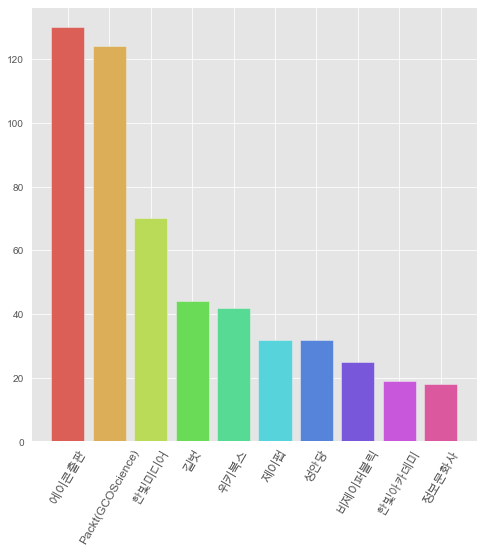

In [1855]:
plt.figure(figsize=(8,8))

colors=sns.color_palette('hls',10)
plt.bar(pv_1719_top20.index, pv_1719_top20['17-19년 합계'], color=colors)

plt.xticks(rotation=60, fontsize=12)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=12, bottom=True)
plt.show();

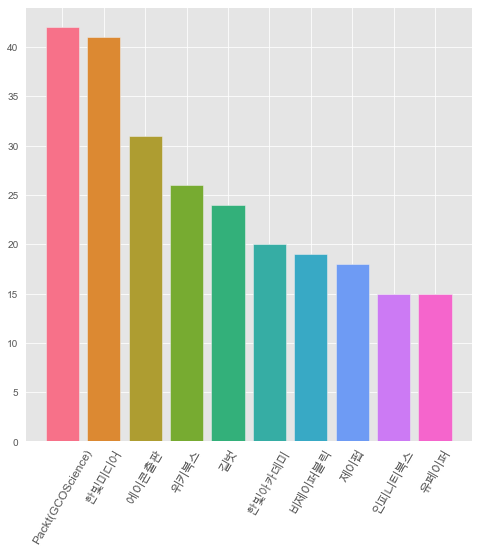

In [1854]:
plt.figure(figsize=(8,8))

colors=sns.color_palette('husl',10)
plt.bar(pv_2021_top20.index, pv_2021_top20['20-21년 합계'], color=colors)

plt.xticks(rotation=60, fontsize=12)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=12, bottom=True)
plt.show();

In [1795]:
pv_2021.sort_values(by='20-21년 합계',ascending=False,inplace=True)

In [1849]:
pv_2021_top20 = pv_2021.head(10)

In [1757]:
pv_2021.loc[pv_2021['20-21년 합계'] == 0]

,최근 2년 C,최근 2년 C#,최근 2년 C++,최근 2년 Java,최근 2년 JavaScript,최근 2년 PHP,최근 2년 Python,최근 2년 R,최근 2년 SQL,최근 2년 Visual Basic,20-21년 합계
출판사,,,,,,,,,,,
PCBOOK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e비즈북스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가메출판사,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
경남대학교출판부,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
경북대학교출판부,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
한울아카데미,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
한티미디어,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
햄큐,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1759]:
len(pv_1719.loc[pv_1719['17-19년 합계'] == 0])

60

In [1791]:
# 최근 5년 내 출판 권수, 출판사개수
for i in range(1,11):
    print(i, len(publisher_year.loc[publisher_year['sum'] == i]))

1 87
2 35
3 23
4 16
5 9
6 9
7 3
8 4
9 2
10 2


In [1762]:
pub0_1719 = []

for idx, row in pv_1719.iterrows():
    if row['17-19년 합계'] == 0:
        pub0_1719.append(idx)
len(pub0_1719)
    

60

In [1763]:
pub0_2021 = []

for idx, row in pv_2021.iterrows():
    if row['20-21년 합계'] == 0:
        pub0_2021.append(idx)
len(pub0_2021)

82

In [1767]:
len(set(pub0_1719) - set(pub0_2021)),len(set(pub0_2021) - set(pub0_1719))

(60, 82)

In [1889]:
publisher_year.sort_values(by='sum',ascending=False).head(20)

,17-19년C,17-19년C#,17-19년C++,17-19년Java,17-19년JavaScript,17-19년PHP,17-19년Python,17-19년R,17-19년SQL,17-19년Visual Basic,...,최근 2년Java,최근 2년JavaScript,최근 2년PHP,최근 2년Python,최근 2년R,최근 2년SQL,최근 2년Visual Basic,sum,sum_1719,sum_2021
출판사,,,,,,,,,,,,,,,,,,,,,
Packt(GCOScience),2.0,13.0,11.0,20.0,9.0,1.0,57.0,9.0,2.0,0.0,...,1.0,3.0,0.0,21.0,2.0,1.0,0.0,166.0,124.0,42.0
에이콘출판,12.0,6.0,18.0,9.0,8.0,0.0,53.0,22.0,2.0,0.0,...,1.0,2.0,0.0,15.0,3.0,0.0,0.0,161.0,130.0,31.0
한빛미디어,8.0,5.0,5.0,10.0,4.0,3.0,27.0,3.0,5.0,0.0,...,3.0,4.0,2.0,19.0,1.0,7.0,0.0,111.0,70.0,41.0
위키북스,2.0,5.0,0.0,0.0,4.0,1.0,28.0,1.0,1.0,0.0,...,0.0,1.0,0.0,14.0,1.0,3.0,0.0,68.0,42.0,26.0
길벗,5.0,1.0,2.0,5.0,6.0,1.0,19.0,2.0,3.0,0.0,...,3.0,1.0,0.0,10.0,3.0,1.0,0.0,68.0,44.0,24.0
제이펍,3.0,0.0,1.0,4.0,4.0,0.0,10.0,8.0,2.0,0.0,...,1.0,2.0,0.0,13.0,2.0,0.0,0.0,50.0,32.0,18.0
비제이퍼블릭,0.0,0.0,1.0,0.0,1.0,4.0,15.0,1.0,3.0,0.0,...,3.0,1.0,0.0,10.0,3.0,1.0,0.0,44.0,25.0,19.0
성안당,12.0,1.0,4.0,3.0,2.0,0.0,6.0,0.0,3.0,1.0,...,0.0,0.0,1.0,3.0,1.0,0.0,0.0,39.0,32.0,7.0
한빛아카데미,6.0,0.0,3.0,2.0,1.0,1.0,2.0,3.0,1.0,0.0,...,1.0,0.0,0.0,7.0,4.0,0.0,1.0,39.0,19.0,20.0


In [1862]:
publisher_year.columns = publisher_year.columns.get_level_values(0) + publisher_year.columns.get_level_values(1)

In [1870]:
publisher_year.columns

Index(['17-19년C', '17-19년C#', '17-19년C++', '17-19년Java', '17-19년JavaScript',
       '17-19년PHP', '17-19년Python', '17-19년R', '17-19년SQL',
       '17-19년Visual Basic', '최근 2년C', '최근 2년C#', '최근 2년C++', '최근 2년Java',
       '최근 2년JavaScript', '최근 2년PHP', '최근 2년Python', '최근 2년R', '최근 2년SQL',
       '최근 2년Visual Basic', 'sum', 'sum_1719', 'sum_2021'],
      dtype='object')

In [1901]:
publi_year_top20 = publisher_year.sort_values(by='sum',ascending=False).head(20)

In [1905]:
publi_year_top20.columns[10:20]

Index(['최근 2년C', '최근 2년C#', '최근 2년C++', '최근 2년Java', '최근 2년JavaScript',
       '최근 2년PHP', '최근 2년Python', '최근 2년R', '최근 2년SQL', '최근 2년Visual Basic'],
      dtype='object')

In [1904]:
p_y_col = list(publi_year_top20.columns[:10])
p_y_col

['17-19년C',
 '17-19년C#',
 '17-19년C++',
 '17-19년Java',
 '17-19년JavaScript',
 '17-19년PHP',
 '17-19년Python',
 '17-19년R',
 '17-19년SQL',
 '17-19년Visual Basic']

In [1906]:
p_y_col_2 = list(publi_year_top20.columns[10:20])
p_y_col_2

['최근 2년C',
 '최근 2년C#',
 '최근 2년C++',
 '최근 2년Java',
 '최근 2년JavaScript',
 '최근 2년PHP',
 '최근 2년Python',
 '최근 2년R',
 '최근 2년SQL',
 '최근 2년Visual Basic']

In [ ]:
# top12pub = ['Packt(GCOScience)', '에이콘출판', '한빛미디어', '위키북스', '길벗', '제이펍', '비제이퍼블릭','성안당', '한빛아카데미', '인사이트', '인피니티북스', '생능출판사', '정보문화사', '북스홀릭퍼블리싱','복두출판사', '온노트', '이지스퍼블리싱', '생능출판', '사도출판', '유페이퍼']

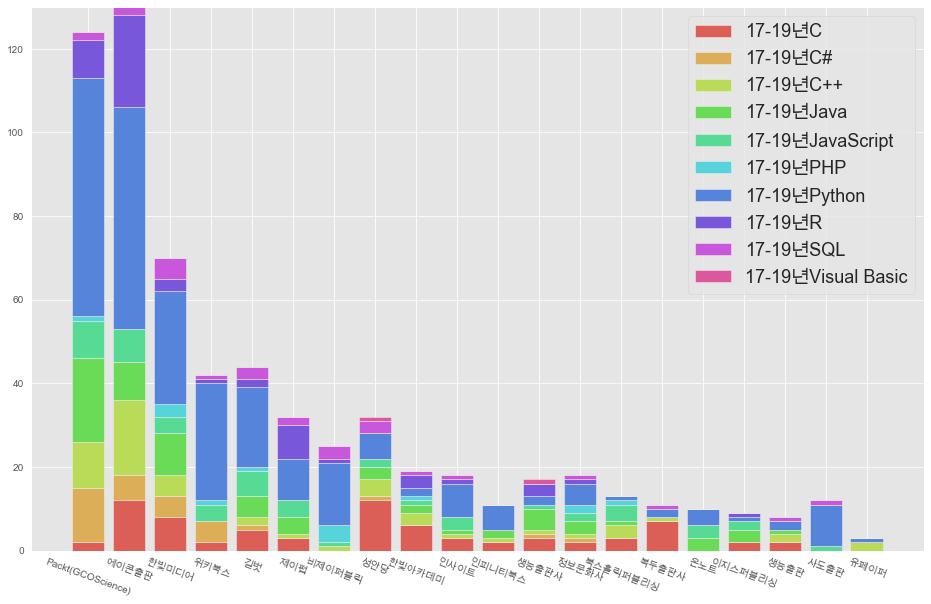

In [1922]:
## 이...이게 되네...! 한번에 성공,,,,얼떨떨,,,,

plt.style.use('ggplot')
fig = plt.figure(figsize=(16,10))
colors = sns.color_palette('hls',10)


bott = 0
n = 0
for col in p_y_col:
    plt.bar(publi_year_top10.index, publi_year_top10[col], color=colors[n], bottom=bott, label=col)
    n += 1
    bott += publi_year_top10[col]
plt.legend(loc='upper right',fontsize=18)
# for col in p_y_col_2:
    
plt.xticks(rotation=340)
plt.show();


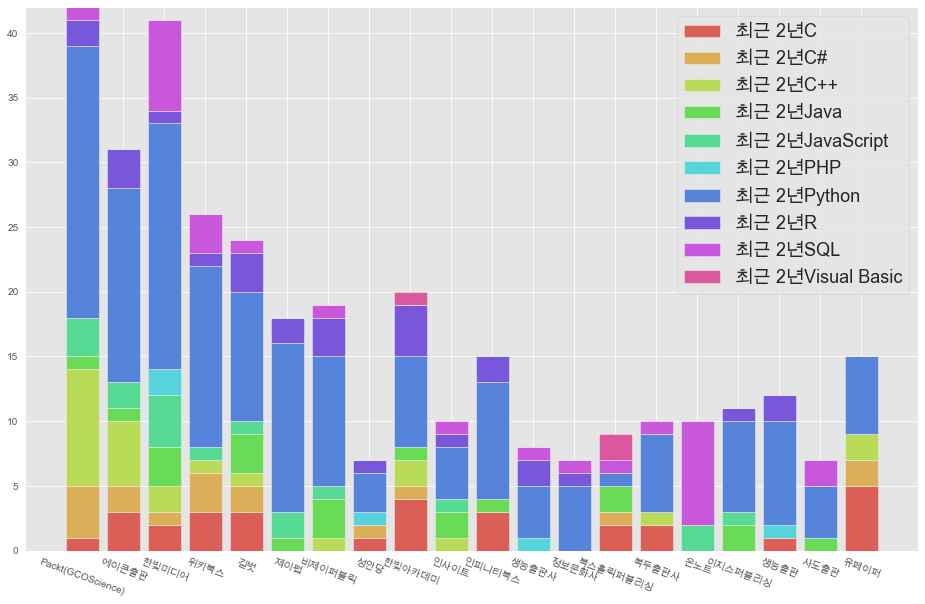

In [1921]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(16,10))
colors = sns.color_palette('hls',10)


bott = 0
n = 0
for col in p_y_col_2:
    plt.bar(publi_year_top10.index, publi_year_top10[col], color=colors[n], bottom=bott, label=col)
    n += 1
    bott += publi_year_top10[col]
plt.legend(loc='upper right',fontsize=18)
# for col in p_y_col_2:
    
plt.xticks(rotation=340)
plt.show();

In [1900]:
publi_year_top10

,17-19년C,17-19년C#,17-19년C++,17-19년Java,17-19년JavaScript,17-19년PHP,17-19년Python,17-19년R,17-19년SQL,17-19년Visual Basic,...,최근 2년Java,최근 2년JavaScript,최근 2년PHP,최근 2년Python,최근 2년R,최근 2년SQL,최근 2년Visual Basic,sum,sum_1719,sum_2021
출판사,,,,,,,,,,,,,,,,,,,,,
Packt(GCOScience),2.0,13.0,11.0,20.0,9.0,1.0,57.0,9.0,2.0,0.0,...,1.0,3.0,0.0,21.0,2.0,1.0,0.0,166.0,124.0,42.0
에이콘출판,12.0,6.0,18.0,9.0,8.0,0.0,53.0,22.0,2.0,0.0,...,1.0,2.0,0.0,15.0,3.0,0.0,0.0,161.0,130.0,31.0
한빛미디어,8.0,5.0,5.0,10.0,4.0,3.0,27.0,3.0,5.0,0.0,...,3.0,4.0,2.0,19.0,1.0,7.0,0.0,111.0,70.0,41.0
위키북스,2.0,5.0,0.0,0.0,4.0,1.0,28.0,1.0,1.0,0.0,...,0.0,1.0,0.0,14.0,1.0,3.0,0.0,68.0,42.0,26.0
길벗,5.0,1.0,2.0,5.0,6.0,1.0,19.0,2.0,3.0,0.0,...,3.0,1.0,0.0,10.0,3.0,1.0,0.0,68.0,44.0,24.0
제이펍,3.0,0.0,1.0,4.0,4.0,0.0,10.0,8.0,2.0,0.0,...,1.0,2.0,0.0,13.0,2.0,0.0,0.0,50.0,32.0,18.0
비제이퍼블릭,0.0,0.0,1.0,0.0,1.0,4.0,15.0,1.0,3.0,0.0,...,3.0,1.0,0.0,10.0,3.0,1.0,0.0,44.0,25.0,19.0
성안당,12.0,1.0,4.0,3.0,2.0,0.0,6.0,0.0,3.0,1.0,...,0.0,0.0,1.0,3.0,1.0,0.0,0.0,39.0,32.0,7.0
한빛아카데미,6.0,0.0,3.0,2.0,1.0,1.0,2.0,3.0,1.0,0.0,...,1.0,0.0,0.0,7.0,4.0,0.0,1.0,39.0,19.0,20.0


In [ ]:
# 출판연도로 plot 그려보기


In [7]:
result_final.head(2)

,제목,출판사,출판일,가격,ISBN,언어,링크,페이지수
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,2020-10-30,32000,1165213192 9791165213190,Python,http://book.naver.com/bookdb/book_detail.php?b...,640
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,2020-10-08,25000,8956748578 9788956748573,Python,http://book.naver.com/bookdb/book_detail.php?b...,310


In [10]:
result_final['출판일'] = result_final['출판일'].astype(str)

In [11]:
result_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6456 entries, 0 to 6455
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      6456 non-null   object
 1   출판사     6456 non-null   object
 2   출판일     6456 non-null   object
 3   가격      6456 non-null   int64 
 4   ISBN    6455 non-null   object
 5   언어      6456 non-null   object
 6   링크      6456 non-null   object
 7   페이지수    6456 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 453.9+ KB


In [13]:
result_final['출판일'][0][:4]

'2020'

In [15]:
pubyear = []

for idx, row in result_final.iterrows():
    pyear = row['출판일'][:4]
    pubyear.append(pyear)
len(pubyear)

6456

In [16]:
result_final['출판연도'] = pubyear
result_final

,제목,출판사,출판일,가격,ISBN,언어,링크,페이지수,출판연도
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,2020-10-30,32000,1165213192 9791165213190,Python,http://book.naver.com/bookdb/book_detail.php?b...,640,2020
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,2020-10-08,25000,8956748578 9788956748573,Python,http://book.naver.com/bookdb/book_detail.php?b...,310,2020
2,파이썬 딥러닝 텐서플로 (Python Deep Learning TensorFlow),정보문화사,2021-06-30,27000,8956749094 9788956749099,Python,http://book.naver.com/bookdb/book_detail.php?b...,432,2021
3,파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...,정보문화사,2021-01-05,25000,8956749000 9788956749006,Python,http://book.naver.com/bookdb/book_detail.php?b...,304,2021
4,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,2021-02-25,26000,118557879X 9791185578798,Python,http://book.naver.com/bookdb/book_detail.php?b...,368,2021
...,...,...,...,...,...,...,...,...,...
6451,자바스크립트 2ND EDITION월드와이드웹용,B&B(비앤비),2000-04-07,13000,8986929546 9788986929546,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,295,2000
6452,L교수와함께하는자바스크립트,정일,2001-01-30,20000,8988784545 9788988784549,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0,2001
6453,자바 & 베이직 스크립트 (따라해보세요),한글과컴퓨터,1997-11-14,15000,8983540249 9788983540249,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,518,1997
6454,알기쉬운 자바 스크립트 활용,정보문화사,1997-05-13,20000,8976273281 9788976273284,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,826,1997


In [20]:
result_final['출판연도'].unique(), len(result_final['출판연도'].unique())

(array(['2020', '2021', '2017', '2019', '2018', '2014', '2016', '2015',
        '2012', '2001', '2000', '2002', '2007', '1998', '2003', '2011',
        '2013', '2010', '2005', '2009', '2008', '2006', '2004', '1993',
        '1999', '1997', '1995', '1992', '1991', '1996', '1994', '1990',
        '1989', '1988', '1986', '1985', '1987'], dtype=object),
 37)

In [18]:
result_final.sort_values(by='출판연도')

,제목,출판사,출판일,가격,ISBN,언어,링크,페이지수,출판연도
2179,C 언어프로그래밍,홍릉과학출판사,1985-08-01,4000,8342000176 2008342000175,C,http://book.naver.com/bookdb/book_detail.php?b...,222,1985
2178,C 언어연습,홍릉과학출판사,1986-09-01,5000,834200015X 2008342000151,C,http://book.naver.com/bookdb/book_detail.php?b...,248,1986
2196,C 언어기초+α (C PRIMER PLUS),교학사,1986-12-01,15000,0589000535 2000589000536,C,http://book.naver.com/bookdb/book_detail.php?b...,734,1986
2258,기초 C언어입문,건축문화,1986-04-01,7000,2938000626 2002938000624,C,http://book.naver.com/bookdb/book_detail.php?b...,336,1986
2195,C언어기초+a,교학사,1986-12-01,8000,0589000519 2000589000512,C,http://book.naver.com/bookdb/book_detail.php?b...,734,1986
...,...,...,...,...,...,...,...,...,...
445,파이썬 코딩의 기초(문제해결을 위한) (문제해결을 위한),상학당,2021-07-01,32000,8965872138 9788965872139,Python,http://book.naver.com/bookdb/book_detail.php?b...,388,2021
4209,MySQL 데이터베이스와 클라우드(2판)(인공지능 사물인터넷을 위한)(2판) (인공...,복두출판사,2021-02-05,22000,1166750043 9791166750045,SQL,http://book.naver.com/bookdb/book_detail.php?b...,350,2021
4210,Let’s Get IT(렛츠기릿) SQL 프로그래밍(Let’s Get IT(렛츠기릿...,길벗,2021-10-20,25000,116521721X 9791165217211,SQL,http://book.naver.com/bookdb/book_detail.php?b...,532,2021
4227,실전 스프링 부트 REST API 개발 MyBatis + MySQL 개정판,온노트,2021-04-06,10000,1190230194 9791190230193,SQL,http://book.naver.com/bookdb/book_detail.php?b...,0,2021


In [22]:
pubyear_pv = result_final.pivot_table(index='출판연도',columns='언어',values='ISBN',aggfunc=np.count_nonzero)

In [23]:
pubyear_pv.fillna(0,inplace=True)
pubyear_pv

언어,C,C#,C++,Java,JavaScript,PHP,Python,R,SQL,Visual Basic
출판연도,,,,,,,,,,
1985,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1989,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,23.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,43.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1992,36.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
1993,24.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [25]:
pubyear_pv['sum'] = pubyear_pv.sum(axis=1)

In [63]:
pubyear_col = list(pubyear_pv.columns)
pubyear_col

['C',
 'C#',
 'C++',
 'Java',
 'JavaScript',
 'PHP',
 'Python',
 'R',
 'SQL',
 'Visual Basic',
 'sum']

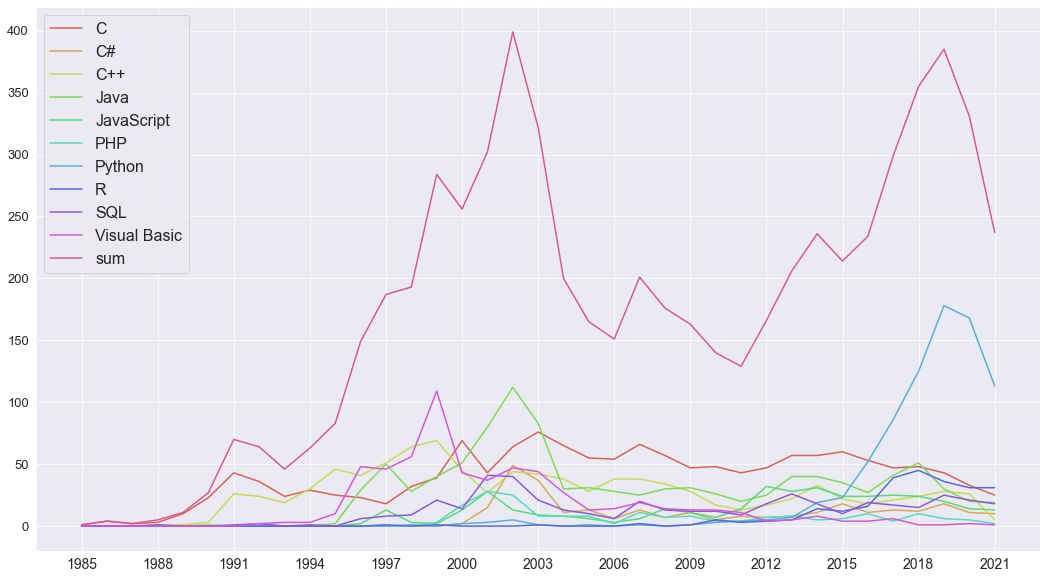

In [64]:
plt.figure(figsize=(18,10))
sns.set_style('darkgrid')
colors = sns.color_palette('hls',11)
n = 0
for col in pubyear_col:
    plt.plot(pubyear_pv.index, pubyear_pv[col],color=colors[n], label=col, )
#    plt.plot(pubyear_pv.index, pubyear_pv[col],'o',color=colors[n], label=col, )
    n += 1
plt.legend(fontsize=16)
plt.xticks(['1985','1988','1991','1994','1997','2000','2003','2006','2009','2012','2015','2018','2021'],fontsize=14)
plt.yticks(fontsize=13)
plt.show()


<br/>

<br/>

# 문제5) 언어별 책 가격, 페이지 수 비교 및 상관관계 확인 

In [532]:
result_final.head(1)

,제목,출판사,출판일,가격,ISBN,언어,링크
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,2020-10-30,32000.0,1165213192 9791165213190,Python,http://book.naver.com/bookdb/book_detail.php?b...


- 상관관계

In [534]:
# plt.scatter(result_final['가격'])

## 페이지 수 데이터 수집

In [548]:
result_final['링크'][0]

'http://book.naver.com/bookdb/book_detail.php?bid=16876960'

In [547]:
len(result_final['링크'])

6456

In [708]:
from tqdm import tqdm_notebook
import re

In [893]:
page_soup = []
for i in range(6456):
    if i == 800:
        page_num = 664
    elif i == 4814:
        page_num = 1252
    else:
        url = result_final['링크'][i]
        response = urlopen(url)
        page = BeautifulSoup(response, 'html.parser')

        page_raw = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text

        if len(page_raw.split()) >= 2:
            page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text.split()[1].split('|')[0]
            
            # 원제가 있는 번역본은 4번째 div태그에서 페이지수를 가져와야한다
            if page_num.isalpha() == True:
                page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0] 
            
            # isbn 번호가 가져와지는 경우가 있기 때문에 10000페이지가 넘는 책은 거의 없을 것이라 생각해 이 경우도 4번째 태그에서 가져왔다.
            if len(page_num) > 4:
                page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0] 
        else:
            page_num = ''

    page_soup.append(page_num)
    print(i, page_num, url)

6450 200 http://book.naver.com/bookdb/book_detail.php?bid=1614146
6451 295 http://book.naver.com/bookdb/book_detail.php?bid=1614630
6452 20000원 http://book.naver.com/bookdb/book_detail.php?bid=1615194
6453 518 http://book.naver.com/bookdb/book_detail.php?bid=1346309
6454 826 http://book.naver.com/bookdb/book_detail.php?bid=45794
6455 420 http://book.naver.com/bookdb/book_detail.php?bid=49060


#### for 문에서 오류 두 번 발생
- 확인해보니 Nonetype은 text()를 가져올 수 없어 그런 것이었다.
각 인덱스 800번 데이터와 4814번 데이터의 링크에 들어가 html을 확인해보았지만, 겉으로 보기엔 문제가 없었으나,
무슨 일인지 데이터가 가져와지지 않았다. 따라서 직접 확인 후 각각 조건에 추가해주었다.
- 800 논타입 에러 (페이지 수: 664)
- 4814 : 논타입 에러 (페이지 수: 1252)

In [ ]:
# 페이지 수집 끝!
page_0_6455 = page_soup

In [895]:
# 개수 확인
len(page_0_6455)

6456

#### 드디어 데이터프레임에 '페이지수'컬럼 추가!!!

In [921]:
result_final['페이지수'] = page_0_6455
result_final.tail()

,제목,출판사,출판일,가격,ISBN,언어,링크,페이지수
6451,자바스크립트 2ND EDITION월드와이드웹용,B&B(비앤비),2000-04-07,13000.0,8986929546 9788986929546,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,295
6452,L교수와함께하는자바스크립트,정일,2001-01-30,20000.0,8988784545 9788988784549,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,20000원
6453,자바 & 베이직 스크립트 (따라해보세요),한글과컴퓨터,1997-11-14,15000.0,8983540249 9788983540249,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,518
6454,알기쉬운 자바 스크립트 활용,정보문화사,1997-05-13,20000.0,8976273281 9788976273284,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,826
6455,깡통들을 위한 자바스크립트,비앤씨,1997-01-18,10000.0,897731061X 9788977310612,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,420


---

## 페이지수 데이터 정제

#### len()을 활용한 검색을 위해 컬럼 전체를 str데이터로 형 변환

In [1002]:
result_final['페이지수'] = result_final['페이지수'].astype(str)

<br/>

### 1) len(result_final['페이지수']) < 3 조건 데이터 조회

#### (1) 페이지수가 '원'으로 끝나는 데이터(가격) 정제
- 가격은 원래 페이지수 다음 줄(다음 'div'태그)에 들어있기 때문에, 이 데이터들은 페이지수가 없다고 볼 수 있다.
- 따라서 nan값을 넣어주었다.

In [977]:
# 페이지수가 '원'으로 끝나는 데이터의 인덱스번호 리스트에 담아주기

won_idx = []

for idx, row in result_final.iterrows():
    if row['페이지수'][-1:] == '원': 
        won_idx.append(idx)
won_idx


[627,
 731,
 771,
 777,
 782,
 789,
 1088,
 1205,
 1716,
 1957,
 2148,
 2916,
 3167,
 3543,
 3545,
 3847,
 4571,
 4585,
 4595,
 4598,
 4705,
 4795,
 4831,
 5514,
 5519,
 5573,
 6020,
 6053,
 6080,
 6213,
 6217,
 6219,
 6220,
 6222,
 6452]

In [979]:
# 해당 인덱스 페이지수에 nan값 넣어주기

for i in won_idx:
    result_final['페이지수'][i] = np.nan
    

In [985]:
result_final['페이지수'][6452]

# 잘 바뀌었다.

nan

#### (2) "C#" 페이지수 가져오기
- 앞선 for문에서 번역본을 위한 isalpha 조건과 4글자 이상 조건에 해당하지 않는 경우가 'C#'이었다.
- 알파벳으로만 이루어져있지도 않고, 두글자이기 때문이다.
- 이 경우도 페이지수가 4번째 div태그에 들어있기 때문에 해당 데이터 페이지수를 다시 크롤링해주었다.

In [981]:
# 페이지수가 'C#'인 데이터의 인덱스번호 리스트에 담아주기
cpound_idx = []

for idx, row in result_final.iterrows():
    if row['페이지수'] == 'C#': 
        cpound_idx.append(idx)
cpound_idx

[1302,
 1447,
 1471,
 1479,
 1509,
 1590,
 1689,
 2867,
 3287,
 3289,
 3317,
 3364,
 3369,
 3382,
 3394,
 3402,
 3404,
 3405,
 3416,
 3447,
 3457,
 3484,
 3486,
 3491,
 3524,
 5360]

In [988]:
# 혹시 몰라 데이터 백업용 df 생성코드(데이터는 소즁하니꽈,,,,)
cpound_datas = []

for idx, row in result_final.iterrows():
    if row['페이지수'] == 'C#': 
        
        url = row['링크']
        response = urlopen(url)
        page = BeautifulSoup(response, 'html.parser')

        page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0] 
        cpound_datas.append({
            'idx' : idx,
            '페이지수' : page_num
        })
#         row['페이지수'] = page_num
        print(idx, page_num, url)
cpound_df = pd.DataFrame(cpound_datas)
cpound_df

1302 1156 http://book.naver.com/bookdb/book_detail.php?bid=1462616
1447 548 http://book.naver.com/bookdb/book_detail.php?bid=251562
1471 664 http://book.naver.com/bookdb/book_detail.php?bid=143707
1479 1048 http://book.naver.com/bookdb/book_detail.php?bid=107555
1509 264 http://book.naver.com/bookdb/book_detail.php?bid=53437
1590 1152 http://book.naver.com/bookdb/book_detail.php?bid=57657
1689 832 http://book.naver.com/bookdb/book_detail.php?bid=57674
2867 462 http://book.naver.com/bookdb/book_detail.php?bid=130876
3287 1399 http://book.naver.com/bookdb/book_detail.php?bid=11221841
3289 448 http://book.naver.com/bookdb/book_detail.php?bid=14820165
3317 676 http://book.naver.com/bookdb/book_detail.php?bid=13131758
3364 760 http://book.naver.com/bookdb/book_detail.php?bid=6946408
3369 1156 http://book.naver.com/bookdb/book_detail.php?bid=1462616
3382 712 http://book.naver.com/bookdb/book_detail.php?bid=241145
3394 548 http://book.naver.com/bookdb/book_detail.php?bid=251562
3402 664 http:

,idx,페이지수
0,1302,1156
1,1447,548
2,1471,664
3,1479,1048
4,1509,264
5,1590,1152
6,1689,832
7,2867,462
8,3287,1399
9,3289,448


In [989]:
for idx, row in result_final.iterrows():
    if row['페이지수'] == 'C#': 
        
        url = row['링크']
        response = urlopen(url)
        page = BeautifulSoup(response, 'html.parser')

        page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0] 

#         row['페이지수'] = page_num
        print(idx, page_num, url)
        
#         for i in cpound_idx:
        result_final['페이지수'][idx] = page_num



1302 1156 http://book.naver.com/bookdb/book_detail.php?bid=1462616
1447 548 http://book.naver.com/bookdb/book_detail.php?bid=251562
1471 664 http://book.naver.com/bookdb/book_detail.php?bid=143707
1479 1048 http://book.naver.com/bookdb/book_detail.php?bid=107555
1509 264 http://book.naver.com/bookdb/book_detail.php?bid=53437
1590 1152 http://book.naver.com/bookdb/book_detail.php?bid=57657
1689 832 http://book.naver.com/bookdb/book_detail.php?bid=57674
2867 462 http://book.naver.com/bookdb/book_detail.php?bid=130876
3287 1399 http://book.naver.com/bookdb/book_detail.php?bid=11221841
3289 448 http://book.naver.com/bookdb/book_detail.php?bid=14820165
3317 676 http://book.naver.com/bookdb/book_detail.php?bid=13131758
3364 760 http://book.naver.com/bookdb/book_detail.php?bid=6946408
3369 1156 http://book.naver.com/bookdb/book_detail.php?bid=1462616
3382 712 http://book.naver.com/bookdb/book_detail.php?bid=241145
3394 548 http://book.naver.com/bookdb/book_detail.php?bid=251562
3402 664 http:

In [990]:
# 잘 변경 됐나 확인!
for idx, row in result_final.iterrows():
    if row['페이지수'] == 'C#': 
        print(idx, row['페이지수'], row['링크'])

# 오예! 아무것도 안나온다! 잘 변경되었다!
# 해결책을 스스로 고민해서 찾아가고 시도하는 모습 멋져요!

In [991]:
type(page_0_6455[800])

int

#### (3) 페이지수가 '소장'인 데이터 6건 확인 후 하나씩 변경

In [992]:
for idx, row in result_final.iterrows():
    if row['페이지수'] == '소장': 
        print(idx, row['페이지수'], row['링크'])

In [967]:
result_final.iloc[2041,7]  = np.nan # 정보 없음
result_final.iloc[3442,7]  = '424' # 알라딘
result_final.iloc[3650,7]  = np.nan # 정보 없음
result_final.iloc[5031,7]  = np.nan
result_final.iloc[6069,7]  = '600' # 예스24
result_final.iloc[6423,7]  = np.nan # 정보 없음

#### (4) 페이지수가 0 또는 1인 데이터(ebook) 확인 후 하나씩 변경
-  ebook의 경우 페이지가 없거나, 0 또는 1로 나타나는 경우가 있어 직접 확인 후 변경해주었다.
- 페이지 수가 0,1로 나오지만, 목차를 보아 0, 1일리가 없어보이는 데이터는 nan값으로 처리해주었다.

In [994]:
for idx, row in result_final.iterrows():
    if row['페이지수'] == '0': 
        print(idx, row['페이지수'], row['링크'])

In [993]:
for idx, row in result_final.iterrows():
    if row['페이지수'] == '1': 
        print(idx, row['페이지수'], row['링크'])

In [ ]:
result_final.iloc[4861,7] = '410'    # 예스24
result_final.iloc[772,7]  = np.nan
result_final.iloc[4026,7]  = np.nan
result_final.iloc[6052,7]  = np.nan
result_final.iloc[2827,7]  = '364'
result_final.iloc[6272,7]  ='57'

<br/>

### 2) len(result_final['페이지수']) > 4 조건 데이터 조회
- 1000 단위로 딱 떨어져 가격으로 추정되는 데이터와, ISBN코드로 보이는 데이터들만 존재한다. 
- 따라서 역시 페이지수가 없는 데이터로 판단하여 np.nan으로 처리해주었다.

In [997]:
for idx, row in result_final.iterrows():
    if len(row['페이지수']) > 4: 
        print(idx, row['페이지수'], row['링크'])

38 18000 http://book.naver.com/bookdb/book_detail.php?bid=20627132
81 15000 http://book.naver.com/bookdb/book_detail.php?bid=16261634
484 9791161752655 http://book.naver.com/bookdb/book_detail.php?bid=14451255
669 14000 http://book.naver.com/bookdb/book_detail.php?bid=15768118
710 10000 http://book.naver.com/bookdb/book_detail.php?bid=15435282
733 11000 http://book.naver.com/bookdb/book_detail.php?bid=14960183
766 15000 http://book.naver.com/bookdb/book_detail.php?bid=14008874
773 15000 http://book.naver.com/bookdb/book_detail.php?bid=13877310
796 10000 http://book.naver.com/bookdb/book_detail.php?bid=11659038
989 18000 http://book.naver.com/bookdb/book_detail.php?bid=17692268
1042 15000 http://book.naver.com/bookdb/book_detail.php?bid=16293301
1217 15000 http://book.naver.com/bookdb/book_detail.php?bid=14442048
1864 9788945072092 http://book.naver.com/bookdb/book_detail.php?bid=1881129
1968 10000 http://book.naver.com/bookdb/book_detail.php?bid=10558154
2411 10800 http://book.naver.co

In [999]:
# 데이터 인덱스번호 리스트에 담아주기
len4plus_idx = []

for idx, row in result_final.iterrows():
    if len(row['페이지수']) > 4:
        len4plus_idx.append(idx)
len4plus_idx

[38,
 81,
 484,
 669,
 710,
 733,
 766,
 773,
 796,
 989,
 1042,
 1217,
 1864,
 1968,
 2411,
 2852,
 3257,
 3293,
 3310,
 4227,
 4230,
 4231,
 4233,
 4256,
 4257,
 4266,
 4270,
 5753,
 5862]

In [1000]:
# 해당 인덱스 페이지수에 nan값 넣어주기

for i in len4plus_idx:
    result_final['페이지수'][i] = np.nan

In [1003]:
# 다시 조회해보며 확인
for idx, row in result_final.iterrows():
    if len(row['페이지수']) > 4: 
        print(idx, row['페이지수'], row['링크'])

In [1018]:
# 페이지수가 'C++'인 데이터의 인덱스번호 리스트에 담아주기
cpound_idx = []

for idx, row in result_final.iterrows():
    if row['페이지수'] == 'C++': 
        cpound_idx.append(idx)
cpound_idx

[861,
 941,
 1045,
 1066,
 1159,
 1210,
 1393,
 1398,
 1586,
 1708,
 1755,
 2293,
 2308,
 2334,
 2349,
 2384,
 2395,
 2438,
 2450,
 2468,
 2547,
 2550,
 2554,
 2564,
 2628,
 2640,
 2644,
 2711,
 2725,
 2732,
 2756,
 2771,
 2775,
 2983,
 2993,
 3158,
 3179]

In [1044]:
# 'C#'', 'C#':, 'C＃','C++', 'C++:','GDI+', '('로 시작, 'XML', 일본어포함 변경

for idx, row in result_final.iterrows():
    if row['페이지수'] == 'XML,': 
        
        url = row['링크']
        response = urlopen(url)
        page = BeautifulSoup(response, 'html.parser')

        page_num = page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0] 

#         row['페이지수'] = page_num
        print(idx, page_num, url)
        
#         for i in cpound_idx:
        result_final['페이지수'][idx] = page_num

5382 578 http://book.naver.com/bookdb/book_detail.php?bid=112649


#### 페이지수 float형 변환

In [1245]:
result_final['페이지수'] = result_final['페이지수'].astype(float)

- nan 값을 0으로 처리

In [1241]:
# 데이터 인덱스번호 리스트에 담아주기
nan_idx = []

for idx, row in result_final.iterrows():
    if row['페이지수'] == 'nan':
        nan_idx.append(idx)
len(nan_idx)

72

In [1242]:
for i in nan_idx:
    result_final['페이지수'][i] = 0

In [1243]:
for idx, row in result_final.iterrows():
    if row['페이지수'] == 'nan' : 
        print(idx, row['페이지수'], row['링크'])

In [1272]:
result_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   제목      6456 non-null   object        
 1   출판사     6456 non-null   object        
 2   출판일     6456 non-null   datetime64[ns]
 3   가격      6456 non-null   float64       
 4   ISBN    6456 non-null   object        
 5   언어      6456 non-null   object        
 6   링크      6456 non-null   object        
 7   페이지수    6456 non-null   float64       
 8   출판국가    6456 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 454.1+ KB


#### 페이지수가 너무 많은 데이터 정제
- 상세 페이지에 책 페이지 수가 누락되어 가격이 잘못 들어간 데이터로 판단.
- 2500페이지를 넘는 책은 발견하지 못했으므로 2500을 기준으로 변경.

In [1432]:
np.average(result_final['Pages'])

515.2334262701363

In [1433]:
for idx, row in result_final.iterrows():
    if row['Pages'] == 0: 
        print(idx, row['Pages'], row['언어'], row['링크'])

38 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=20627132
41 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=20470213
46 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=18524179
81 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=16261634
103 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=15408001
191 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=7451859
484 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=14451255
604 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=17762512
615 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=17553866
627 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=16897193
639 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=16592390
669 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=15768118
676 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=16293317
695 0.0 Python http://book.naver.com/bookdb/book_detail.

In [1284]:
toomuch_idx = []

for idx, row in result_final.iterrows():
    if row['페이지수'] > 2500: 
        toomuch_idx.append(idx)
len(toomuch_idx)

3

In [1285]:
for i in toomuch_idx:
    result_final['페이지수'][i] = 0

In [1292]:
result_final['페이지수'].unique().max()

2456.0

----

#### 엑셀파일로 저장

In [1049]:
result_final.to_excel('../hangnii/oneday_project_raw.xlsx',encoding='utf-8')

In [5]:
result_final = pd.read_excel('../hangnii/oneday_project_raw.xlsx',index_col=0)
result_final

,제목,출판사,출판일,가격,ISBN,언어,링크,페이지수
0,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,2020-10-30,32000,1165213192 9791165213190,Python,http://book.naver.com/bookdb/book_detail.php?b...,640
1,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,2020-10-08,25000,8956748578 9788956748573,Python,http://book.naver.com/bookdb/book_detail.php?b...,310
2,파이썬 딥러닝 텐서플로 (Python Deep Learning TensorFlow),정보문화사,2021-06-30,27000,8956749094 9788956749099,Python,http://book.naver.com/bookdb/book_detail.php?b...,432
3,파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...,정보문화사,2021-01-05,25000,8956749000 9788956749006,Python,http://book.naver.com/bookdb/book_detail.php?b...,304
4,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,2021-02-25,26000,118557879X 9791185578798,Python,http://book.naver.com/bookdb/book_detail.php?b...,368
...,...,...,...,...,...,...,...,...
6451,자바스크립트 2ND EDITION월드와이드웹용,B&B(비앤비),2000-04-07,13000,8986929546 9788986929546,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,295
6452,L교수와함께하는자바스크립트,정일,2001-01-30,20000,8988784545 9788988784549,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,0
6453,자바 & 베이직 스크립트 (따라해보세요),한글과컴퓨터,1997-11-14,15000,8983540249 9788983540249,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,518
6454,알기쉬운 자바 스크립트 활용,정보문화사,1997-05-13,20000,8976273281 9788976273284,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,826


In [5]:
len(result_final)

6456

---

## 책 가격과 페이지 수 상관관계 분석

In [1212]:
result_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   제목      6456 non-null   object        
 1   출판사     6456 non-null   object        
 2   출판일     6456 non-null   datetime64[ns]
 3   가격      6456 non-null   float64       
 4   ISBN    6456 non-null   object        
 5   언어      6456 non-null   object        
 6   링크      6456 non-null   object        
 7   페이지수    6456 non-null   float64       
 8   출판국가    6456 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 454.1+ KB


In [1446]:
result_zero_except.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6348 entries, 0 to 6455
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   제목      6348 non-null   object        
 1   출판사     6348 non-null   object        
 2   출판일     6348 non-null   datetime64[ns]
 3   Price   6348 non-null   float64       
 4   ISBN    6348 non-null   object        
 5   언어      6348 non-null   object        
 6   링크      6348 non-null   object        
 7   Pages   6348 non-null   float64       
 8   출판국가    6348 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 495.9+ KB


## 책 가격, 페이지 수 boxplot으로 비교해보기

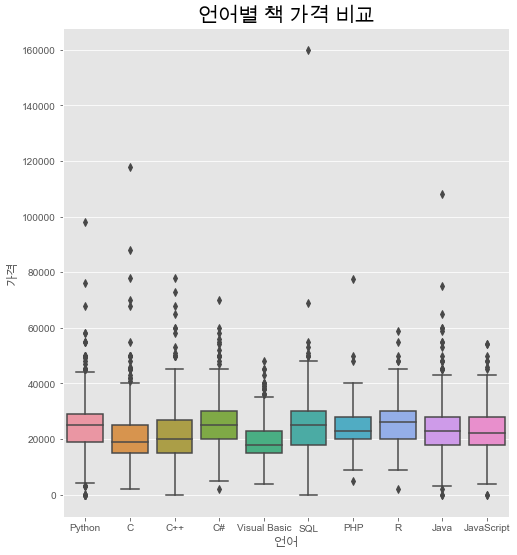

In [1251]:
### 전체 데이터 언어별 책 가격 비교
plt.figure(figsize=(8,9))
sns.boxplot(x=result_final['언어'],
            y=result_final['가격'])
plt.title('언어별 책 가격 비교', fontsize=20)
plt.show()

In [1684]:
result_final['링크'][5652]

'http://book.naver.com/bookdb/book_detail.php?bid=9331619'

In [1679]:
result_final.sort_values(by='Price',ascending=False)

,제목,출판사,출판일,Price,ISBN,언어,링크,Pages,출판국가
4584,SQL SERVER TRAINING (MICROSOFT),삼각형,1998-01-09,160000.0,8974674165 9788974674168,SQL,http://book.naver.com/bookdb/book_detail.php?b...,1000.0,한국
1353,"보안 코딩 세트 (개발자가 바로 사용할 수 있는, 전4권,한정판,버그 없는 안전한 ...",에이콘출판,2013-01-01,118000.0,8960773883 9788960773882,C,http://book.naver.com/bookdb/book_detail.php?b...,1948.0,한국
5652,"스프링과 JPA를 활용한 자바 엔터프라이즈 애플리케이션 개발 세트 (전3권,자바 O...",에이콘출판,2015-07-31,108000.0,8960777447 9788960777446,Java,http://book.naver.com/bookdb/book_detail.php?b...,2456.0,한국
362,한권으로 파이썬과 드론 날로 먹기 : 인공지능편 (드론포함) (개정판),잇플ITPLE,2021-04-01,98000.0,1191198073 9791191198072,Python,http://book.naver.com/bookdb/book_detail.php?b...,245.0,한국
1344,"안전한 소프트웨어를 위한 보안 코딩과 평가 세트 (전2권,소프트웨어 보안 평가 + ...",에이콘출판,2014-01-20,88000.0,8960775177 9788960775176,C,http://book.naver.com/bookdb/book_detail.php?b...,1996.0,한국
...,...,...,...,...,...,...,...,...,...
163,타노스의 건틀릿 알고리즘 With Python,사도출판,2018-06-14,0.0,1188786075 9791188786077,Python,http://book.naver.com/bookdb/book_detail.php?b...,79.0,한국
6205,[무료] JavaScript Promise,한빛미디어,2015-01-28,0.0,8968487294 9788968487293,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,126.0,한국
6272,Do it! HTML+CSS+자바스크립트 웹 표준의 정석 [특별부록],이지퍼블리싱,2021-01-28,0.0,1163032301 9791163032304,JavaScript,http://book.naver.com/bookdb/book_detail.php?b...,57.0,한국
772,처음 시작을 위한 파이썬 해설Ⅰ(체험판),불잉걸,2018-08-10,0.0,480D180807620 480D180807620,Python,http://book.naver.com/bookdb/book_detail.php?b...,0.0,해외


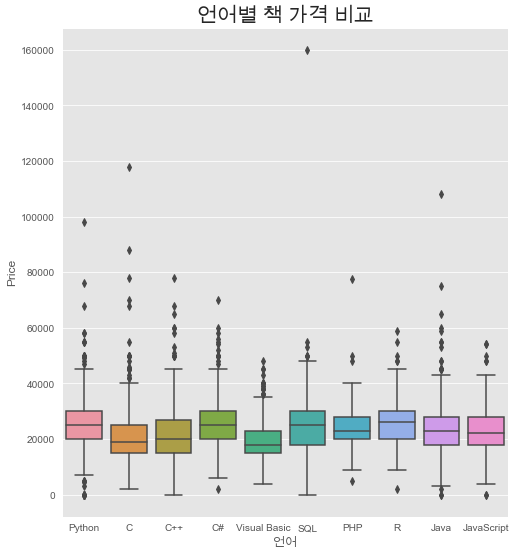

In [1678]:
### 전체 데이터 언어별 책 가격 비교
plt.figure(figsize=(8,9))
sns.boxplot(x=result_zero_except['언어'],
            y=result_zero_except['Price'])
plt.title('언어별 책 가격 비교', fontsize=20)
plt.show()

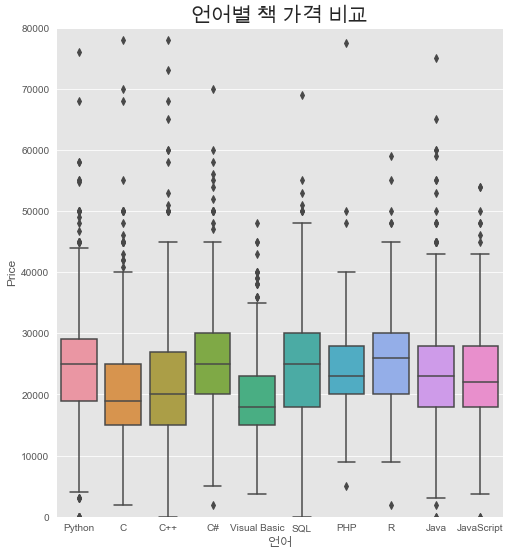

In [1685]:
### 전체 데이터 언어별 책 가격 비교
plt.figure(figsize=(8,9))
sns.boxplot(x=result_final['언어'],
            y=result_final['Price'])
plt.title('언어별 책 가격 비교', fontsize=20)
plt.ylim(-0.5,80000)
plt.show()

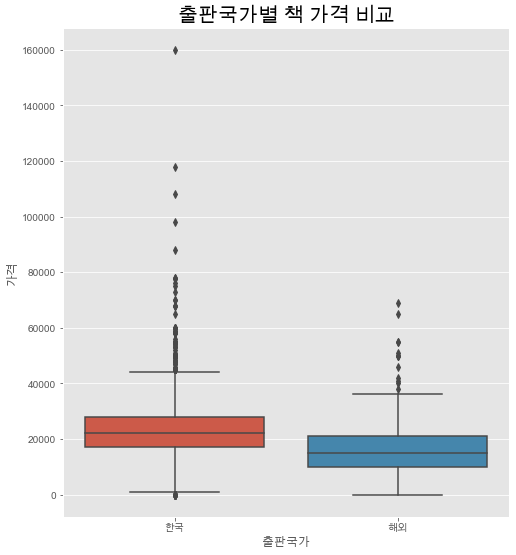

In [1252]:
# 책 가격 한국/해외 책 가격 비교
plt.figure(figsize=(8,9))
sns.boxplot(x=result_final['출판국가'],
            y=result_final['Price'],
            color='Set2'
)
plt.title('출판국가별 책 가격 비교', fontsize=20)
plt.show()

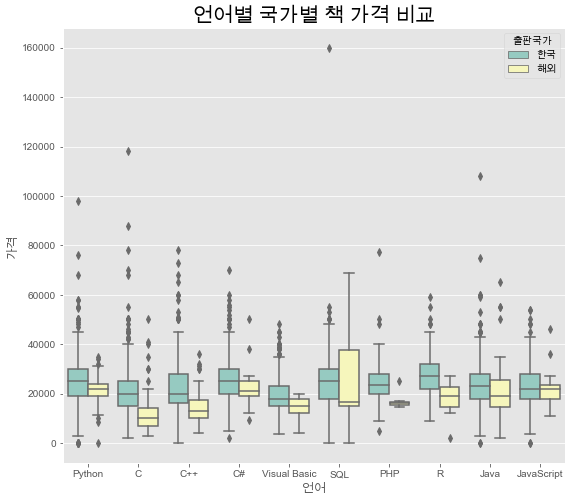

In [1254]:
### 언어별 책 가격 국내/해외 비교
plt.figure(figsize=(9,8))
sns.boxplot(x=result_final['언어'],
            y=result_final['가격'],
            hue=result_final['출판국가'],
            palette='Set3'
           )
plt.title('언어별 국가별 책 가격 비교', fontsize=20)
plt.show()

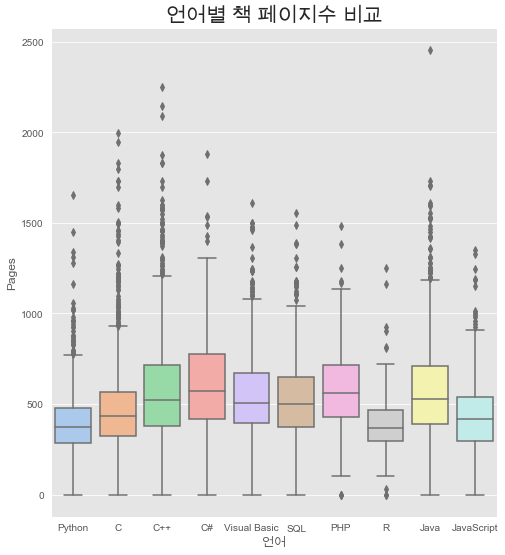

In [1687]:
plt.figure(figsize=(8,9))
sns.boxplot(x=result_final['언어'],
            y=result_final['Pages'],
           palette='pastel')
plt.title('언어별 책 페이지수 비교', fontsize=20)
plt.show()

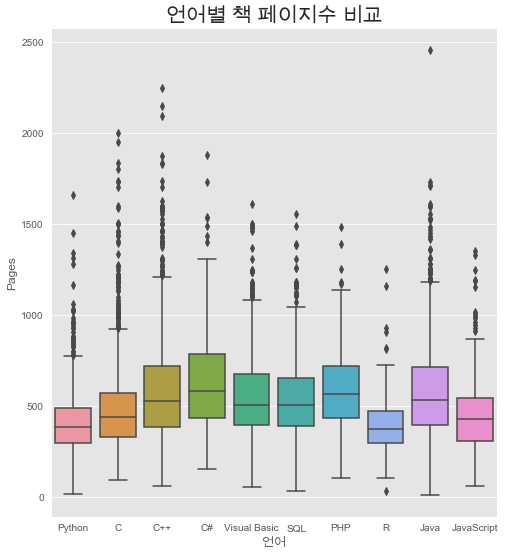

In [1689]:
plt.figure(figsize=(8,9))
sns.boxplot(x=result_zero_except['언어'],
            y=result_zero_except['Pages'],
           )
plt.title('언어별 책 페이지수 비교', fontsize=20)
plt.show()

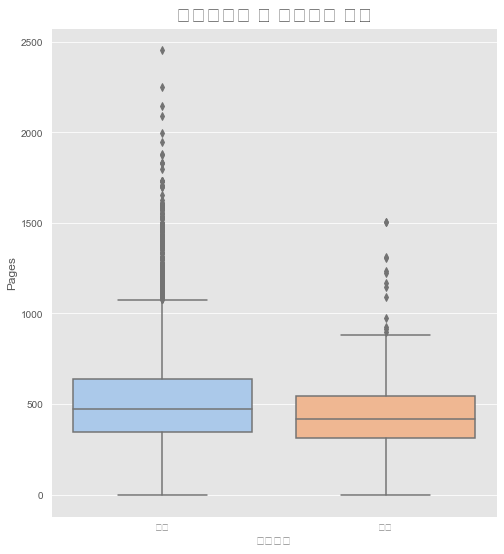

In [1408]:
# 한국/해외 책 페이지수 비교
plt.figure(figsize=(8,9))
sns.boxplot(x=result_final['출판국가'],
            y=result_final['Pages'],
            palette='pastel')
plt.title('출판국가별 책 페이지수 비교', fontsize=20)
plt.show()

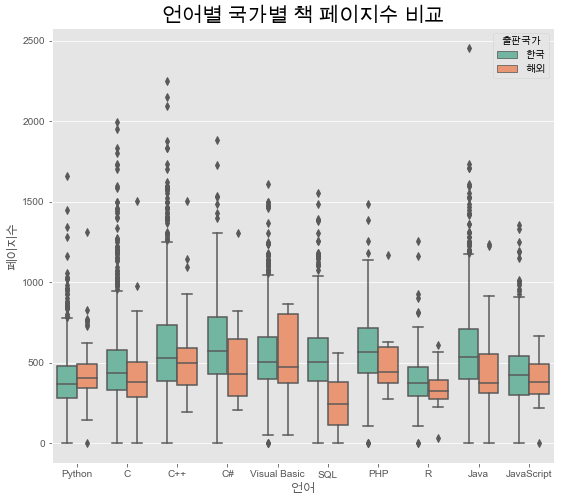

In [1299]:
### 언어별 국가별 책 페이지수 비교
plt.figure(figsize=(9,8))
sns.boxplot(x=result_final['언어'],
            y=result_final['페이지수'],
            hue=result_final['출판국가'],
            palette='Set2'
           )
plt.title('언어별 국가별 책 페이지수 비교', fontsize=20)
plt.show()

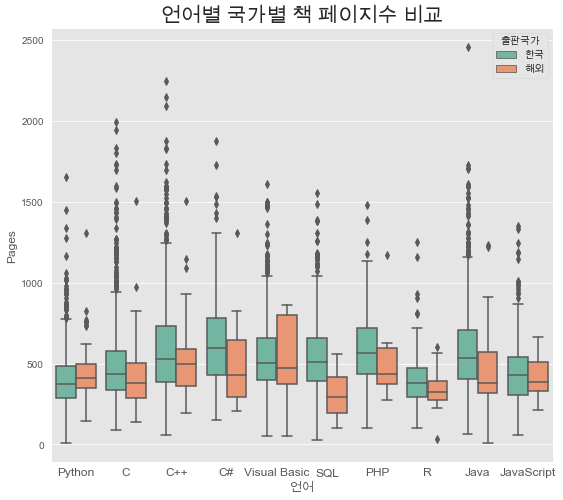

In [1674]:
### 언어별 국가별 책 페이지수 비교
plt.figure(figsize=(9,8))
sns.boxplot(x=result_zero_except['언어'],
            y=result_zero_except['Pages'],
            hue=result_zero_except['출판국가'],
            palette='Set2'
           )
plt.title('언어별 국가별 책 페이지수 비교', fontsize=20)
plt.xticks(,fontsize=12, weight='bold')
plt.tick_params(axis='x', direction='inout')
plt.show()

## 피벗테이블 - 언어별 책 평균가격, 평균 페이지 수

In [1300]:
# 피벗테이블로 가격과 페이지 수 평균 구하고, 각각 내림차순 정렬
book_pivot = result_final.pivot_table(index='언어', values =['가격','페이지수'] ,aggfunc=np.average)
book_page_sort = book_pivot.sort_values(by='페이지수', ascending=False)
book_price_sort = book_pivot.sort_values(by='가격', ascending=False)

In [1322]:
book_pivot

,언어,가격,페이지수
0,C,19899.251191,478.868618
1,C#,26364.189189,615.709459
2,C++,21511.800610,585.808749
3,Java,23591.609756,574.520000
4,JavaScript,22711.111111,433.219638
5,PHP,23860.408163,594.857143
6,Python,24454.636591,394.946115
7,R,26172.580645,391.116935
8,SQL,25013.228700,534.968610
9,Visual Basic,19061.677632,560.687500


In [1301]:
book_page_sort

,가격,페이지수
언어,,
C#,26364.189189,615.709459
PHP,23860.408163,594.857143
C++,21511.800610,585.808749
Java,23591.609756,574.520000
Visual Basic,19061.677632,560.687500
SQL,25013.228700,534.968610
C,19899.251191,478.868618
JavaScript,22711.111111,433.219638
Python,24454.636591,394.946115


In [1302]:
book_price_sort

,가격,페이지수
언어,,
C#,26364.189189,615.709459
R,26172.580645,391.116935
SQL,25013.228700,534.968610
Python,24454.636591,394.946115
PHP,23860.408163,594.857143
Java,23591.609756,574.520000
JavaScript,22711.111111,433.219638
C++,21511.800610,585.808749
C,19899.251191,478.868618


In [1457]:
# 피벗테이블로 가격과 페이지 수 평균 구하고, 각각 내림차순 정렬
book_pivot_0_expt = result_zero_except.pivot_table(index='언어', values =['Price','Pages'] ,aggfunc=np.average)
book_pivot_0_expt.reset_index(inplace=True)

In [1467]:
book_pivot_0_expt.rename(columns={
    'Price_0_x':'Price',
    'Pages_0_x':'Pages',

},inplace=True)

In [1464]:
mean_bigyo = pd.merge(book_pivot,book_pivot_0_expt,how='left',on='언어')
mean_bigyo

,언어,가격,페이지수,Pages_0_x,Price_0_x
0,C,19899.251191,478.868618,484.475207,19930.578512
1,C#,26364.189189,615.709459,630.622837,26687.889273
2,C++,21511.800610,585.808749,590.615385,21511.692308
3,Java,23591.609756,574.520000,581.325765,23602.171767
4,JavaScript,22711.111111,433.219638,450.688172,22894.892473
5,PHP,23860.408163,594.857143,604.103627,23931.813472
6,Python,24454.636591,394.946115,409.840052,25012.483745
7,R,26172.580645,391.116935,394.296748,26228.048780
8,SQL,25013.228700,534.968610,549.760369,25163.364055
9,Visual Basic,19061.677632,560.687500,563.467769,19055.371901


In [1462]:
col = ['언어','가격','Price_0_x','페이지수','Pages_0_x']
mean_bigyo.columns = col

In [1468]:
book_page_sort_0_x = book_pivot_0_expt.sort_values(by='Pages', ascending=False)
book_price_sort_0_x = book_pivot_0_expt.sort_values(by='Price', ascending=False)

In [1471]:
book_page_sort_0_x

,언어,Pages,Price
1,C#,630.622837,26687.889273
5,PHP,604.103627,23931.813472
2,C++,590.615385,21511.692308
3,Java,581.325765,23602.171767
9,Visual Basic,563.467769,19055.371901
8,SQL,549.760369,25163.364055
0,C,484.475207,19930.578512
4,JavaScript,450.688172,22894.892473
6,Python,409.840052,25012.483745
7,R,394.296748,26228.048780


In [1472]:
book_price_sort_0_x

,언어,Pages,Price
1,C#,630.622837,26687.889273
7,R,394.296748,26228.048780
8,SQL,549.760369,25163.364055
6,Python,409.840052,25012.483745
5,PHP,604.103627,23931.813472
3,Java,581.325765,23602.171767
4,JavaScript,450.688172,22894.892473
2,C++,590.615385,21511.692308
0,C,484.475207,19930.578512
9,Visual Basic,563.467769,19055.371901


## 막대그래프로 시각화

In [1370]:
import set_matplotlib_hangul

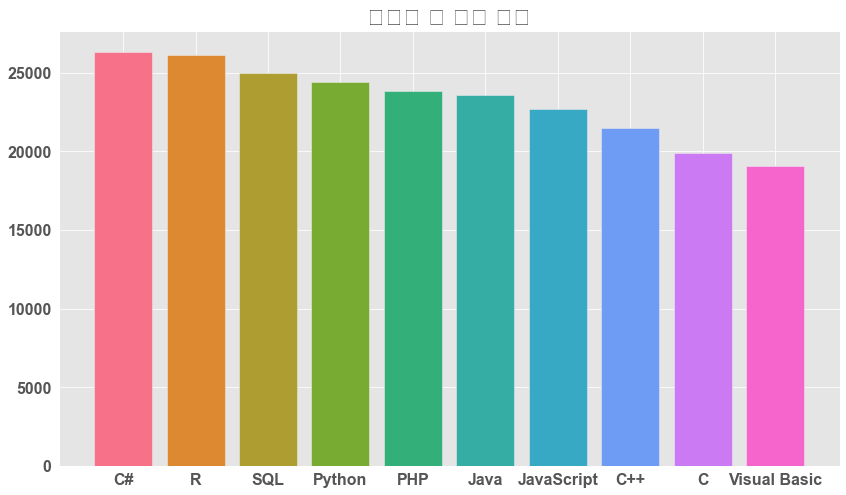

In [1371]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
colors = sns.color_palette('husl',len(book_price_sort.index))
# colors = sns.color_palette("light:#5A9", as_cmap=True)

plt.bar(book_price_sort.index, book_price_sort['가격'], color=colors)
plt.title('언어별 책 평균 가격', fontsize=24)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.show()

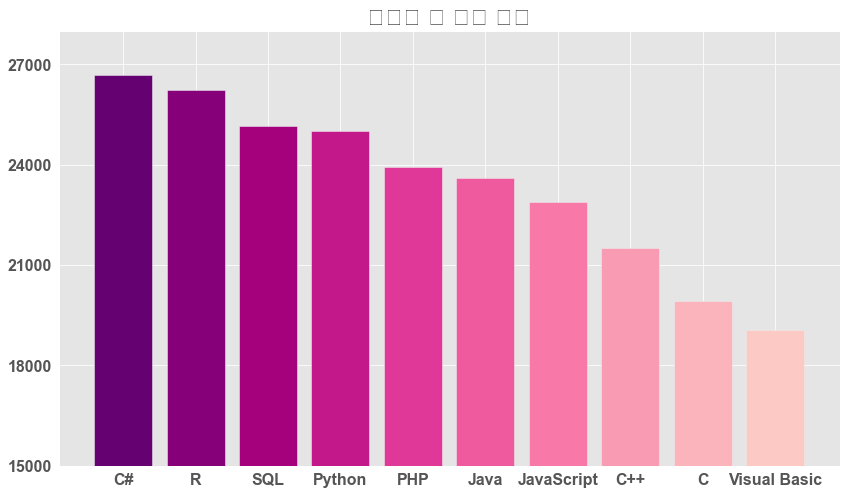

In [1506]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
colors = sns.color_palette('RdPu_r',12)
# colors = sns.color_palette("light:#5A9", as_cmap=True)

plt.bar(book_price_sort_0_x['언어'], book_price_sort_0_x['Price'], color=colors)
plt.title('언어별 책 평균 가격', fontsize=24)
plt.xticks(fontsize=16, weight='bold')
plt.yticks([15000,18000,21000,24000,27000],fontsize=16, weight='bold')
plt.ylim(15000,28000)
plt.show()

<Figure size 1008x576 with 0 Axes>

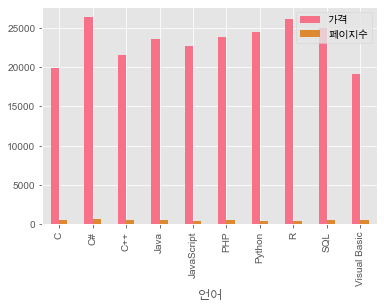

In [1323]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
colors = sns.color_palette('husl',len(book_price_sort.index))
# colors = sns.color_palette("light:#5A9", as_cmap=True)


book_pivot.plot(x='언어', y=['가격','페이지수'], kind='bar',color=colors)
# plt.bar(x=book_pivot.index, y=[book_pivot['가격'], book_pivot['페이지수']], color=colors)
# plt.title('언어별 책 평균 가격, 페이지 수 비교', fontsize=24)
# plt.xticks(fontsize=16, weight='bold')
# plt.yticks(fontsize=16, weight='bold')
plt.show()

- 평균가격대는 19000원 ~ 27000원 사이에 분포하고 있다.

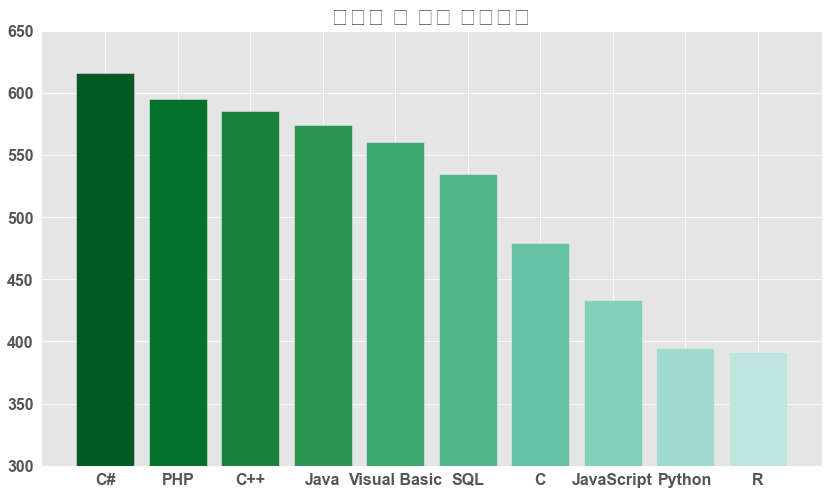

In [1508]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
colors = sns.color_palette('BuGn_r',13)
# colors = sns.color_palette("light:#5A9", as_cmap=True)

plt.bar(book_page_sort.index, book_page_sort['페이지수'], color=colors)
plt.title('언어별 책 평균 페이지수', fontsize=24)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.ylim(300,650)
plt.show()

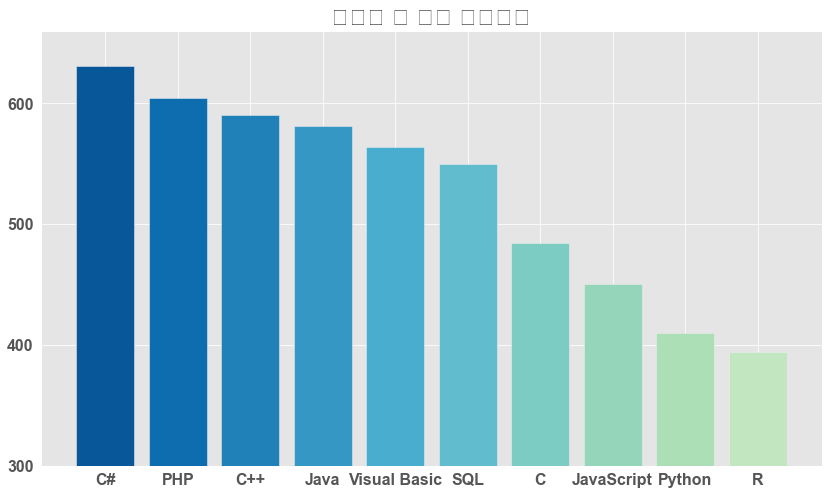

In [1514]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,8))
colors = sns.color_palette('GnBu_r',13)
# colors = sns.color_palette("light:#5A9", as_cmap=True)

plt.bar(book_page_sort_0_x['언어'], book_page_sort_0_x['Pages'], color=colors)
plt.title('언어별 책 평균 페이지수', fontsize=24)
plt.xticks(fontsize=16, weight='bold')
plt.yticks([300,400,500,600],fontsize=16, weight='bold')
plt.ylim(300,660)
plt.show()

### pairplot

In [1372]:
import set_matplotlib_hangul

<Figure size 720x720 with 0 Axes>

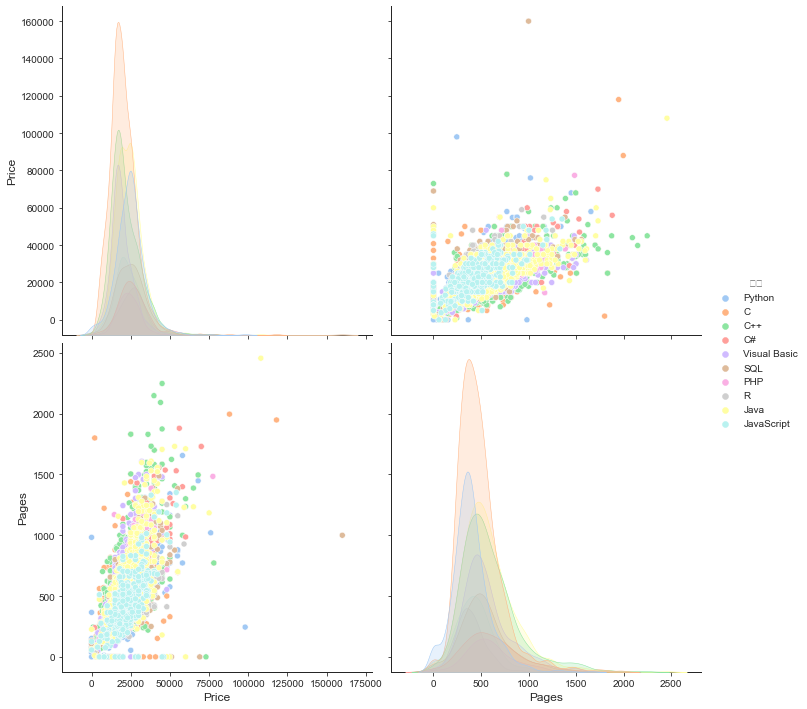

In [1360]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
sns.pairplot(result_final, hue='언어', height=5, palette='pastel')
plt.show()

In [1351]:
result_final.rename(columns={
    '가격':'Price',
    '페이지수':'Pages'
},inplace=True)

<Figure size 720x720 with 0 Axes>

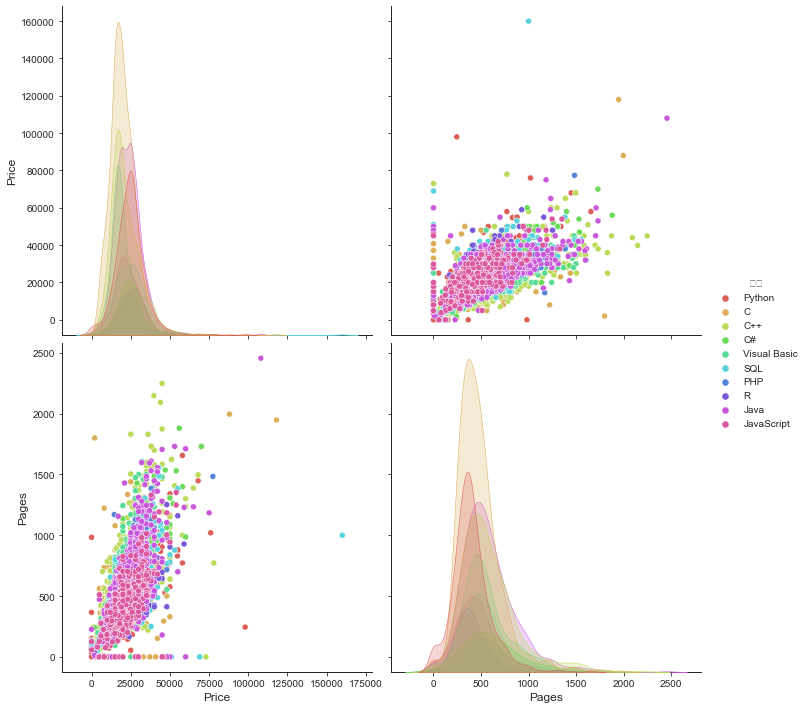

In [1352]:
plt.figure(figsize=(10,10))
sns.set_style('ticks')
sns.pairplot(result_final, hue='언어', height=5,palette='hls')
plt.xlabel='Price'
plt.ylabel='Pages'
plt.show()

<Figure size 720x720 with 0 Axes>

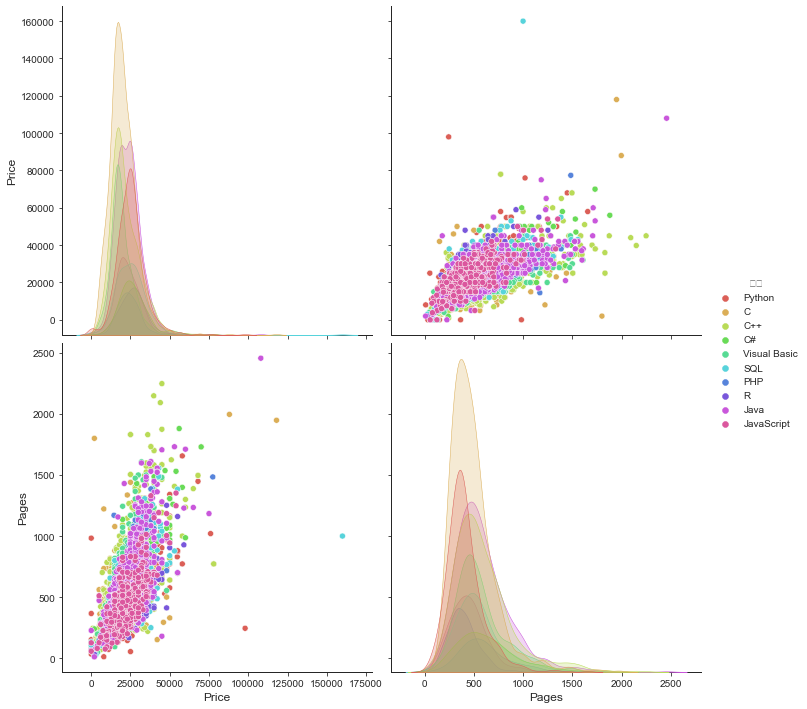

In [1476]:
# page=0 제외
plt.figure(figsize=(10,10))
sns.set_style('ticks')
sns.pairplot(result_zero_except, hue='언어', height=5,palette='hls')
plt.xlabel='Price'
plt.ylabel='Pages'
plt.show()

### lmplot 


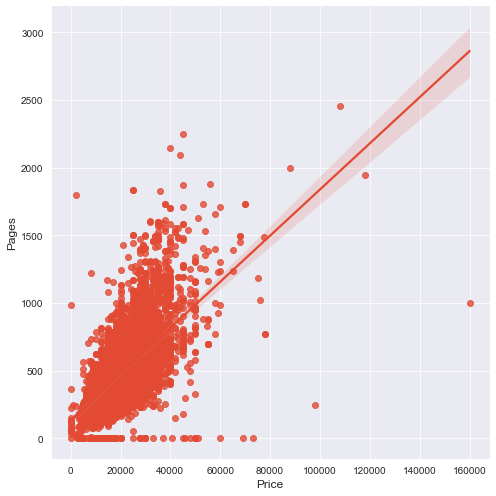

In [1366]:
sns.set_style('darkgrid')
sns.lmplot(x='Price',y='Pages', data=result_final, height=7, palette='')
plt.show()

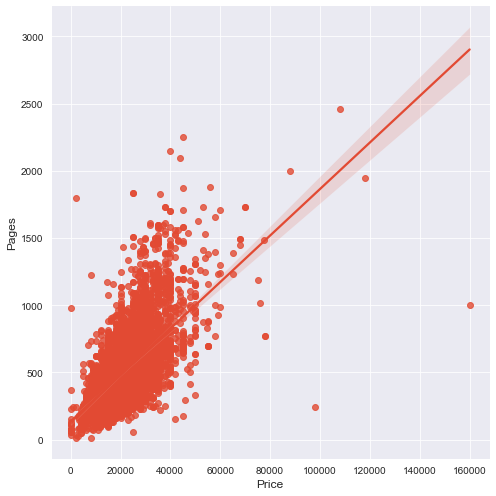

In [1477]:
# 페이지 0 제외
sns.set_style('darkgrid')
sns.lmplot(x='Price',y='Pages', data=result_zero_except, height=7, palette='')
plt.show()

### - 가격과 페이지수의 상관계수는 0.5916이다.

In [1374]:
result_final.corr()

,Price,Pages
Price,1.00000,0.59159
Pages,0.59159,1.00000


In [1478]:
# 페이지 0 제외
result_zero_except.corr()

,Price,Pages
Price,1.000000,0.604413
Pages,0.604413,1.000000


### 결론 : 
#### pairplot, lmplot, 상관계수들을 확인해 본 결과, 책 가격과 페이지 간 상관관계가 유의미하다고 볼 수 있다.

<br/>

In [1386]:
book_pivot

,언어,가격,페이지수
0,C,19899.251191,478.868618
1,C#,26364.189189,615.709459
2,C++,21511.800610,585.808749
3,Java,23591.609756,574.520000
4,JavaScript,22711.111111,433.219638
5,PHP,23860.408163,594.857143
6,Python,24454.636591,394.946115
7,R,26172.580645,391.116935
8,SQL,25013.228700,534.968610
9,Visual Basic,19061.677632,560.687500


In [1423]:
f1p = np.polyfit(book_pivot['가격'],book_pivot['페이지수'],1)
f1p

array([-4.30329410e-03,  6.16582323e+02])

In [1424]:
f1 = np.poly1d(f1p)
f1

poly1d([-4.30329410e-03,  6.16582323e+02])

In [1529]:
fx = np.linspace(18500,27000,100)

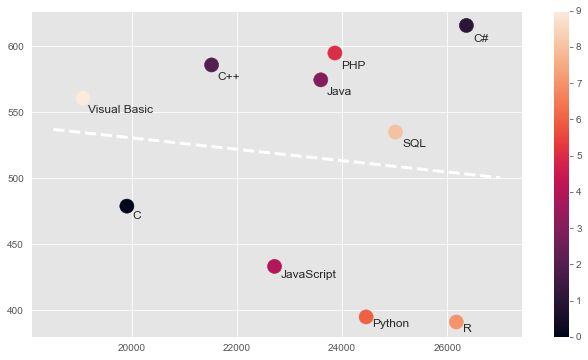

In [1530]:
# 언어별 평균가격과 평균페이지수 데이터 산점도로 표현

t = np.array(range(0, 10))

colormap = t 

colormap = ['blue',]


plt.figure(figsize=(11, 6))
plt.scatter(book_pivot['가격'], book_pivot['페이지수'], s=200, c=colormap, )
plt.colorbar()
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='white')
for n in range(10):
    plt.text(x=book_pivot['가격'][n] * 1.005, y=book_pivot['페이지수'][n]*0.98, s=book_pivot['언어'][n],fontsize=12)
plt.show()

---

In [1434]:
page_zero=[]
for idx, row in result_final.iterrows():
    if row['Pages'] == 0: 
        print(idx, row['Pages'], row['언어'], row['링크'])
        page_zero.append(idx)
len(page_zero)

38 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=20627132
41 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=20470213
46 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=18524179
81 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=16261634
103 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=15408001
191 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=7451859
484 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=14451255
604 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=17762512
615 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=17553866
627 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=16897193
639 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=16592390
669 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=15768118
676 0.0 Python http://book.naver.com/bookdb/book_detail.php?bid=16293317
695 0.0 Python http://book.naver.com/bookdb/book_detail.

108

In [1437]:
result_zero_except = result_final.copy()

In [1445]:
result_zero_except = result_zero_except.loc[result_zero_except['Pages']!=0,:]

In [909]:
len(result_final['페이지수']) > 3
# re.search('+\D\+',result_final['페이지수'])
# re.match('\D',page_soup[1]).string

True

In [764]:
page_soup[1].isalpha()

True

In [763]:
len(re.match('\D',page_soup[1]).string) > 0

True

In [741]:
len(re.match('\D',page_soup[6]).group()) > 0

True

In [ ]:
#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3) > em:nth-child(1)

In [892]:
result_final['링크'][6455]

'http://book.naver.com/bookdb/book_detail.php?bid=49060'

In [794]:
url = result_final['링크'][4814]
response = urlopen(url)
page = BeautifulSoup(response, 'html.parser')
print(page.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <meta content="website" property="og:type"/>
  <meta content="[네이버: 로그인]" property="og:title"/>
  <meta content="안전한 로그인을 위해 주소창의 URL과 자물쇠 마크를 확인하세요!" property="og:description"/>
  <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/>
  <meta content="image/png" property="og:image:type"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="1200" property="og:image:height"/>
  <title>
   네이버 : 로그인
  </title>
  <link href="/login/css/global/desktop/w_202105.css?20210812" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <div class="wrap" id="wrap">
   <div class="u_skip">
    <a href="https://www.naver.com">
     본문 바로가기
    </a>
   </div>
   <header class="header" role="banner">
    <d

In [806]:
# 페이지 수 불러오는 코드
#page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text.split()[1].split('|')[0]
page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)')

In [777]:
# 페이지 수 불러오는 코드
page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4)').text.split()[1].split('|')[0]


'360'

In [684]:
# 페이지 수 불러오는 코드
page.select('em')[3].text # == '페이지'

'페이지'

In [667]:
page.select('div.book_info_inner > div > em')[2].text

'페이지'

In [584]:
# 페이지 수 불러오는 코드
page.select_one('#container > div.spot > div.book_info > div.book_info_inner > div').text

'\n\n별점\n0.0점 | 네티즌리뷰  2건\n'

In [600]:
# page.find(class_='book_info_inner')

In [ ]:
#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(4) > em:nth-child(1)

In [669]:
uzzano = []
test = page.select('div.book_info_inner > div')
for div in test:
#     if div.find('em')
    div.select_one('div.book_info_inner > div > em')[2].text
#     uzzano.append(div.select_one('em').get_attribute_list)
# uzzano    

TypeError: 'NoneType' object is not subscriptable

In [ ]:
for book_link in book_page[:3]:
    url = book_link[i]
    response = urlopen(url)
    print(response.status, book_link)
    page = BeautifulSoup(response, 'html.parser')
#     book_info = page.find(class_='book_info_inner')
    book_em = page.select('em')
    for em in book_em:
        if em.text == '페이지':
            page_num = .text.split()[1].split('|')[0]
